# What kind of player will be admitted into the hall of fame in baseball?
---  
**Created by: Rocha**  
**Date: April 2017**  
We can analyize the question from different perspectives. Such as:  
1. player's biographic data analysis.
2. player's baseball skill analysis
3. player's salary analysis


In [49]:
### import modules
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt
pd.set_option("display.max_columns",50)


## hall of fame 
From the data, we can see that the create of the hall of fame is from **1939** year.  

In [51]:
### read in data
hall_of_fame = pd.read_csv("core/HallOfFame.csv")
## to choose only the player 
hall_of_fame = hall_of_fame[hall_of_fame.category == "Player"]
print(hall_of_fame.info())
hall_of_fame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4153
Data columns (total 9 columns):
playerID       4031 non-null object
yearid         4031 non-null int64
votedBy        4031 non-null object
ballots        3903 non-null float64
needed         3746 non-null float64
votes          3903 non-null float64
inducted       4031 non-null object
category       4031 non-null object
needed_note    157 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 314.9+ KB
None


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


### 1. Who voted the most player ? Whose vote has the power to HOF ?
*BBWAA* vote the most player into the hall of fame, then is voted by *Veterans*, the third is voted by *Run Off*.  
We see that the vote from the **Veterans** has the power to HOF. **Speical Election**,**Old Timers**,**Negro League** also have the great power. However, others vote don't see this phenomenen.

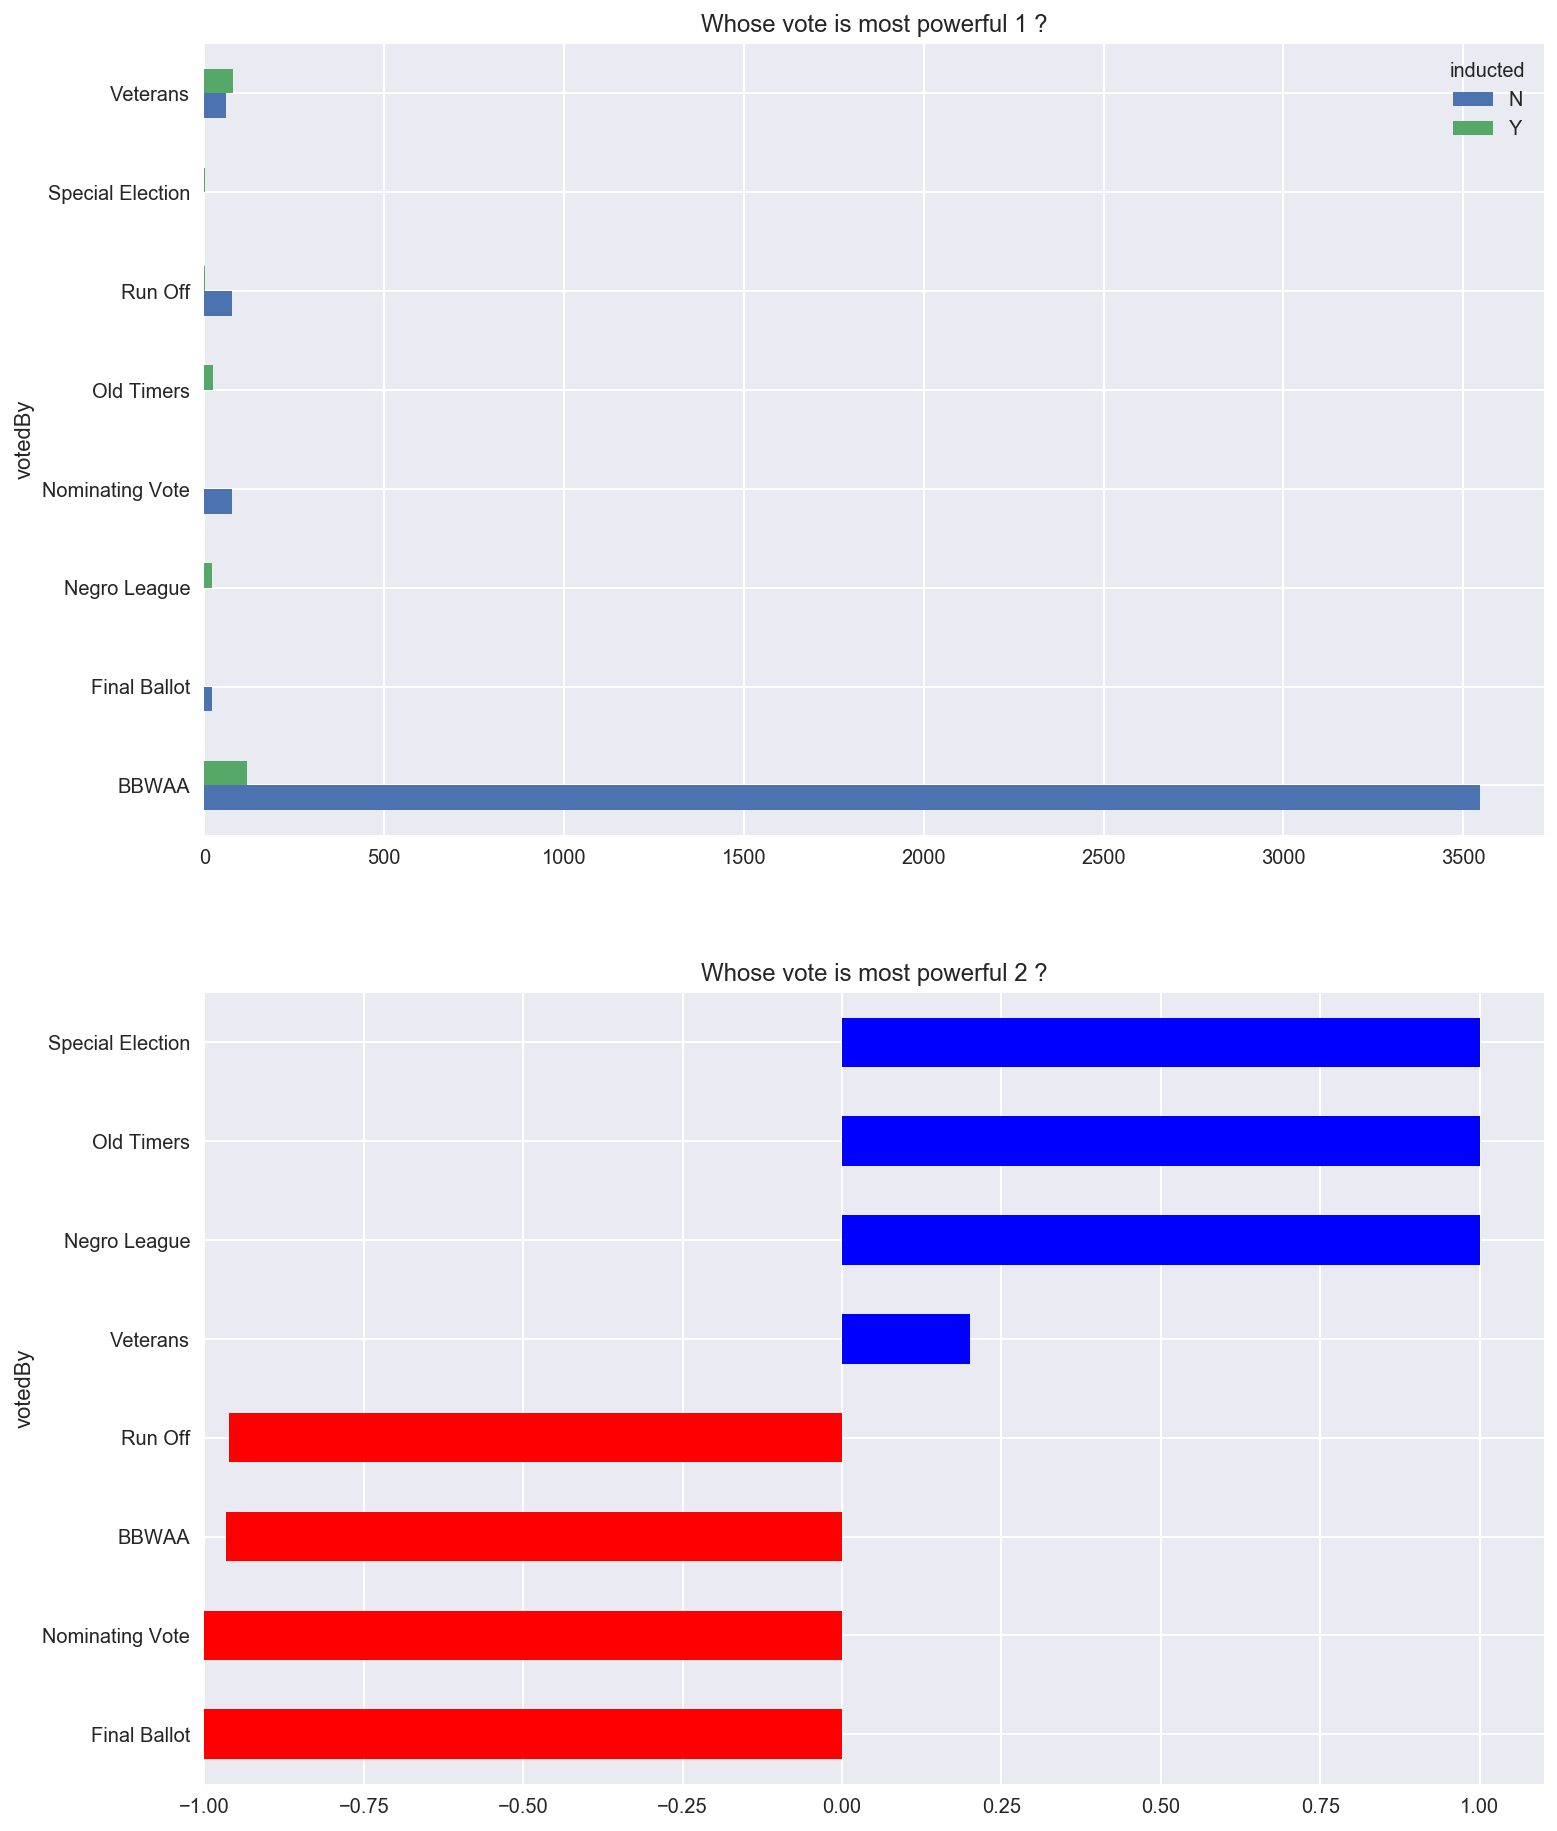

In [82]:
## calculate votedby data with inducted 
voted_by = hall_of_fame.groupby(["votedBy","inducted"]).size().unstack()
norm_voted_by = pd.DataFrame(preprocessing.normalize(voted_by.fillna(0)),columns=voted_by.columns,index=voted_by.index)
norm_voted_by["delta"] = norm_voted_by["Y"] - norm_voted_by["N"]

##plot
fig,axes_voted = plt.subplots(2,1,figsize=(12,16))
colors = ["r","r","r","r","b","b","b","b"]
voted_by[["N","Y"]].plot.barh(title="Whose vote is most powerful 1 ?",ax=axes_voted[0])
norm_voted_by.delta.sort_values().plot.barh(title="Whose vote is most powerful 2 ?",\
                                            ax=axes_voted[1],color=colors)


### 2. How many people enter into the Hall Of Fame each year?
Every year, the number of people chosen into the hall of fame is different. From the fig, we can see that:  
1. Some year we don't choose the popular player because of some reason.  
2. Some year we choose only a few people but some year we choose a lot. The **blue bar** shows the number of HOF, and the **red line** shows the HOF admit rate.

In [5]:
fame_person.groupby("yearid").size().describe()

count    75.000000
mean      3.333333
std       2.219894
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      13.000000
dtype: float64

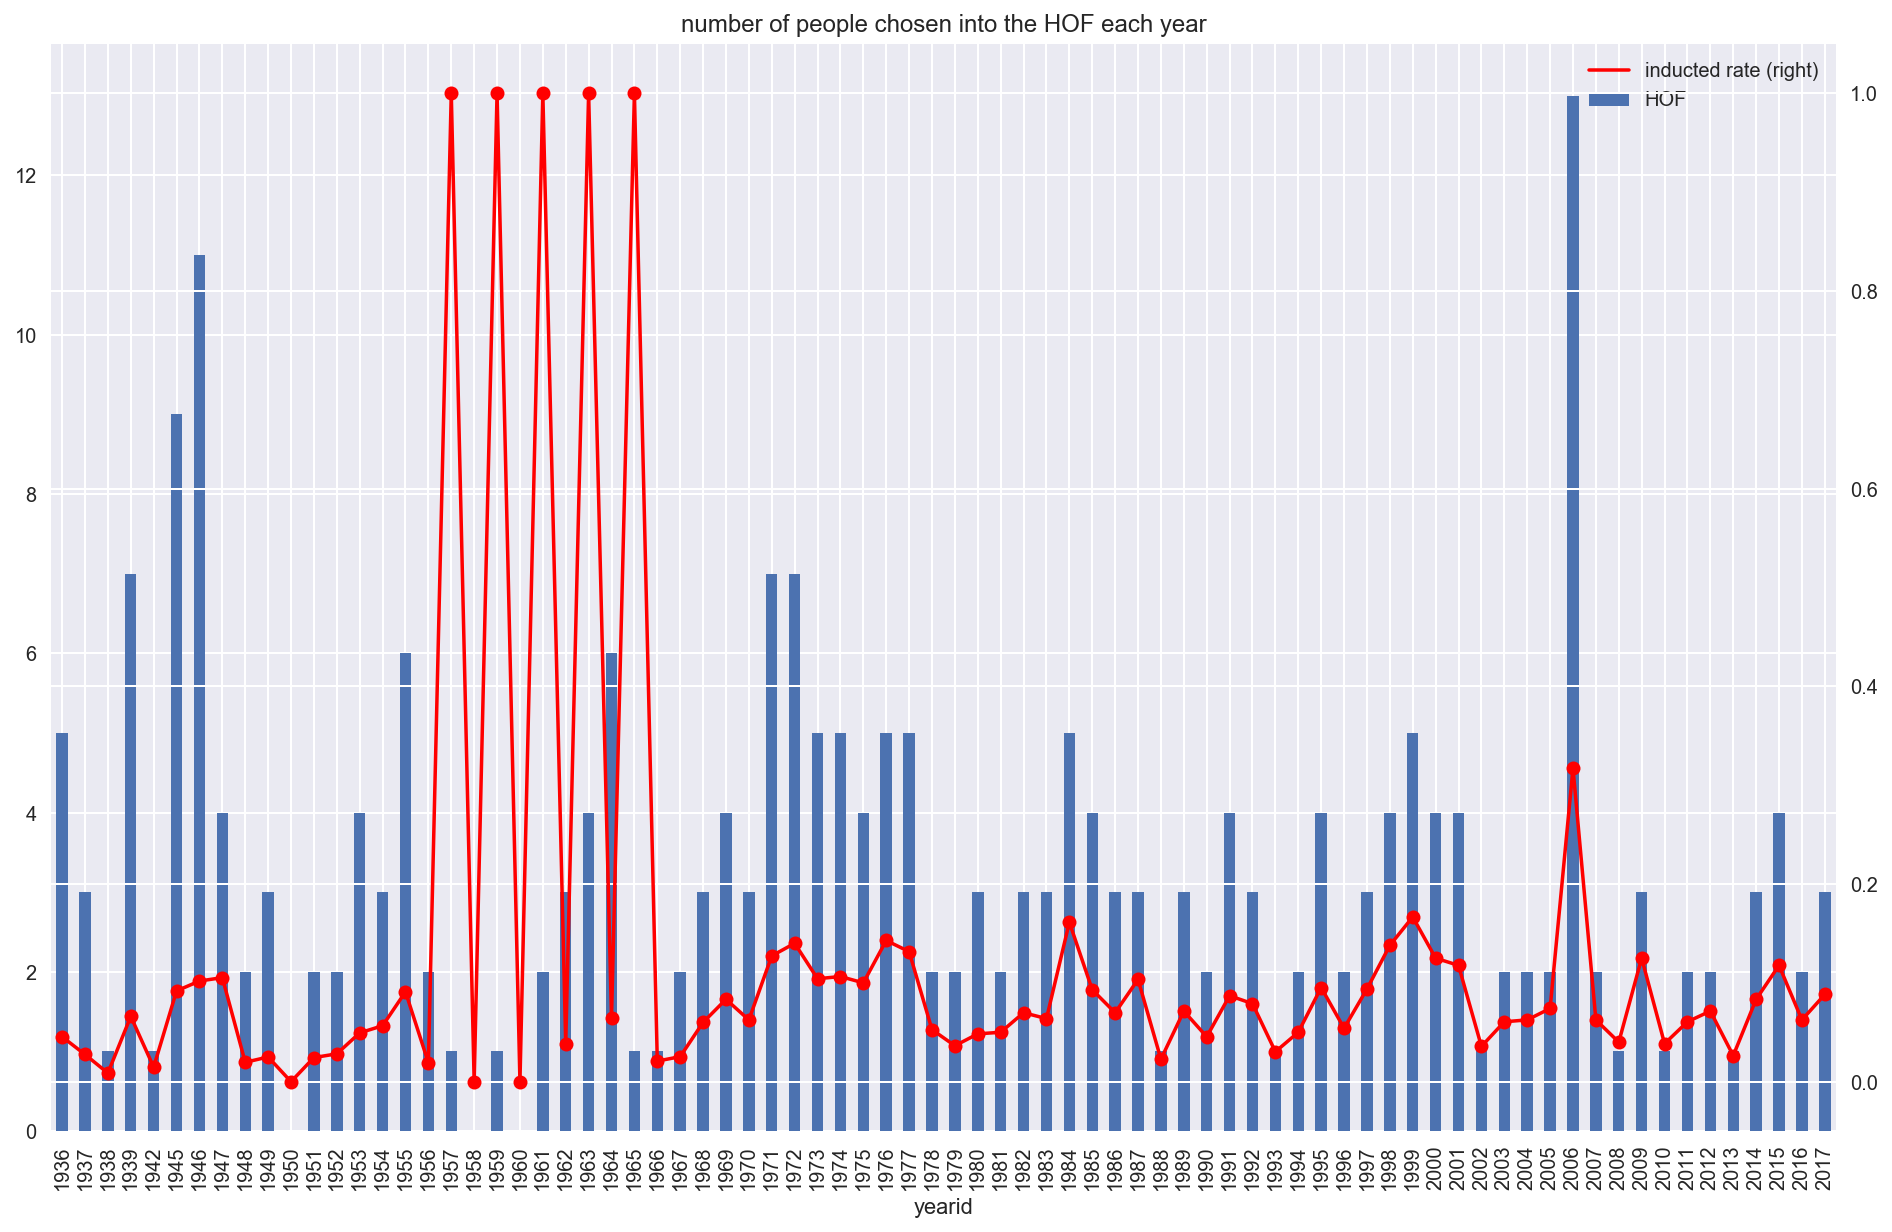

In [150]:
## calculate the year with inducted
induct = hall_of_fame.groupby(["yearid","inducted"]).size().unstack().fillna(0)
induct["inducted rate"] = induct["Y"]/(induct["Y"]+induct["N"])

fig,axes_induct = plt.subplots(1,1,figsize=(16,10))
ax1 = induct.plot(y="inducted rate",kind="line",style="ro-",secondary_y=True,use_index=False,ax=axes_induct)
induct["Y"].plot(kind = "bar",title="number of people chosen into the HOF each year"\
                 ,ax=axes_induct,label="HOF",legend=True)

### 3. Participate the vote multi-times 
Some people have many times take part in the elected to the hall of fame.
A person even tried **20 times** in the ballot, that means 20 years. Most people only have **1** chance.

In [7]:
hall_of_fame.groupby("playerID").size().describe()

count    1208.000000
mean        3.336921
std         4.225997
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        20.000000
dtype: float64

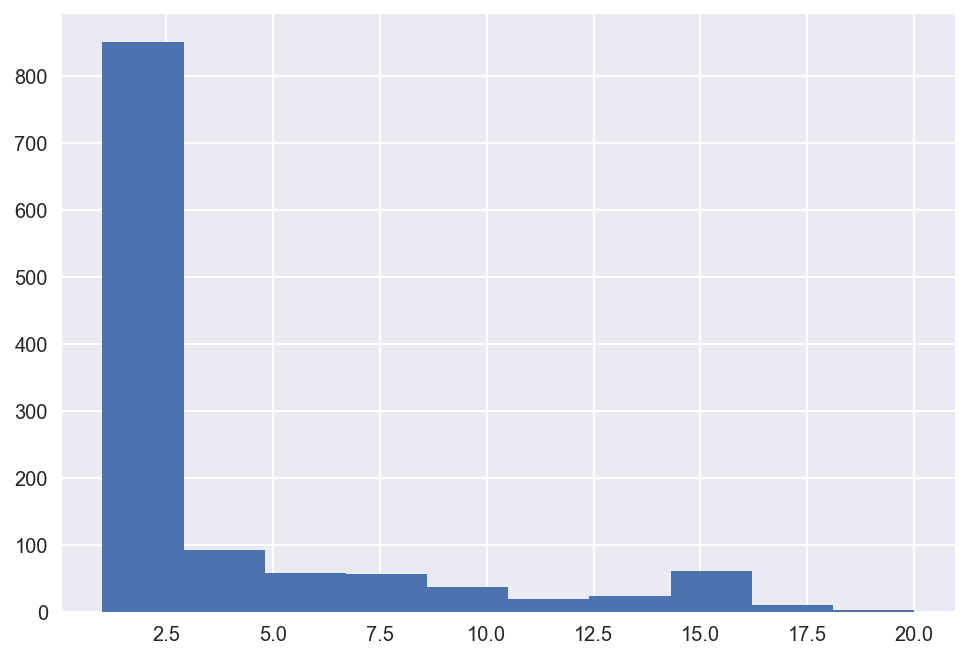

In [8]:
hall_of_fame.groupby("playerID").size().hist()

### 4. How many votes do we needed to be admitted to Hall Of Fame?
The votes needed to enter in the hall of fame is ever increasing. In another words, with the more people have interest in baseball, the player need more vote to enter into the hall of fame

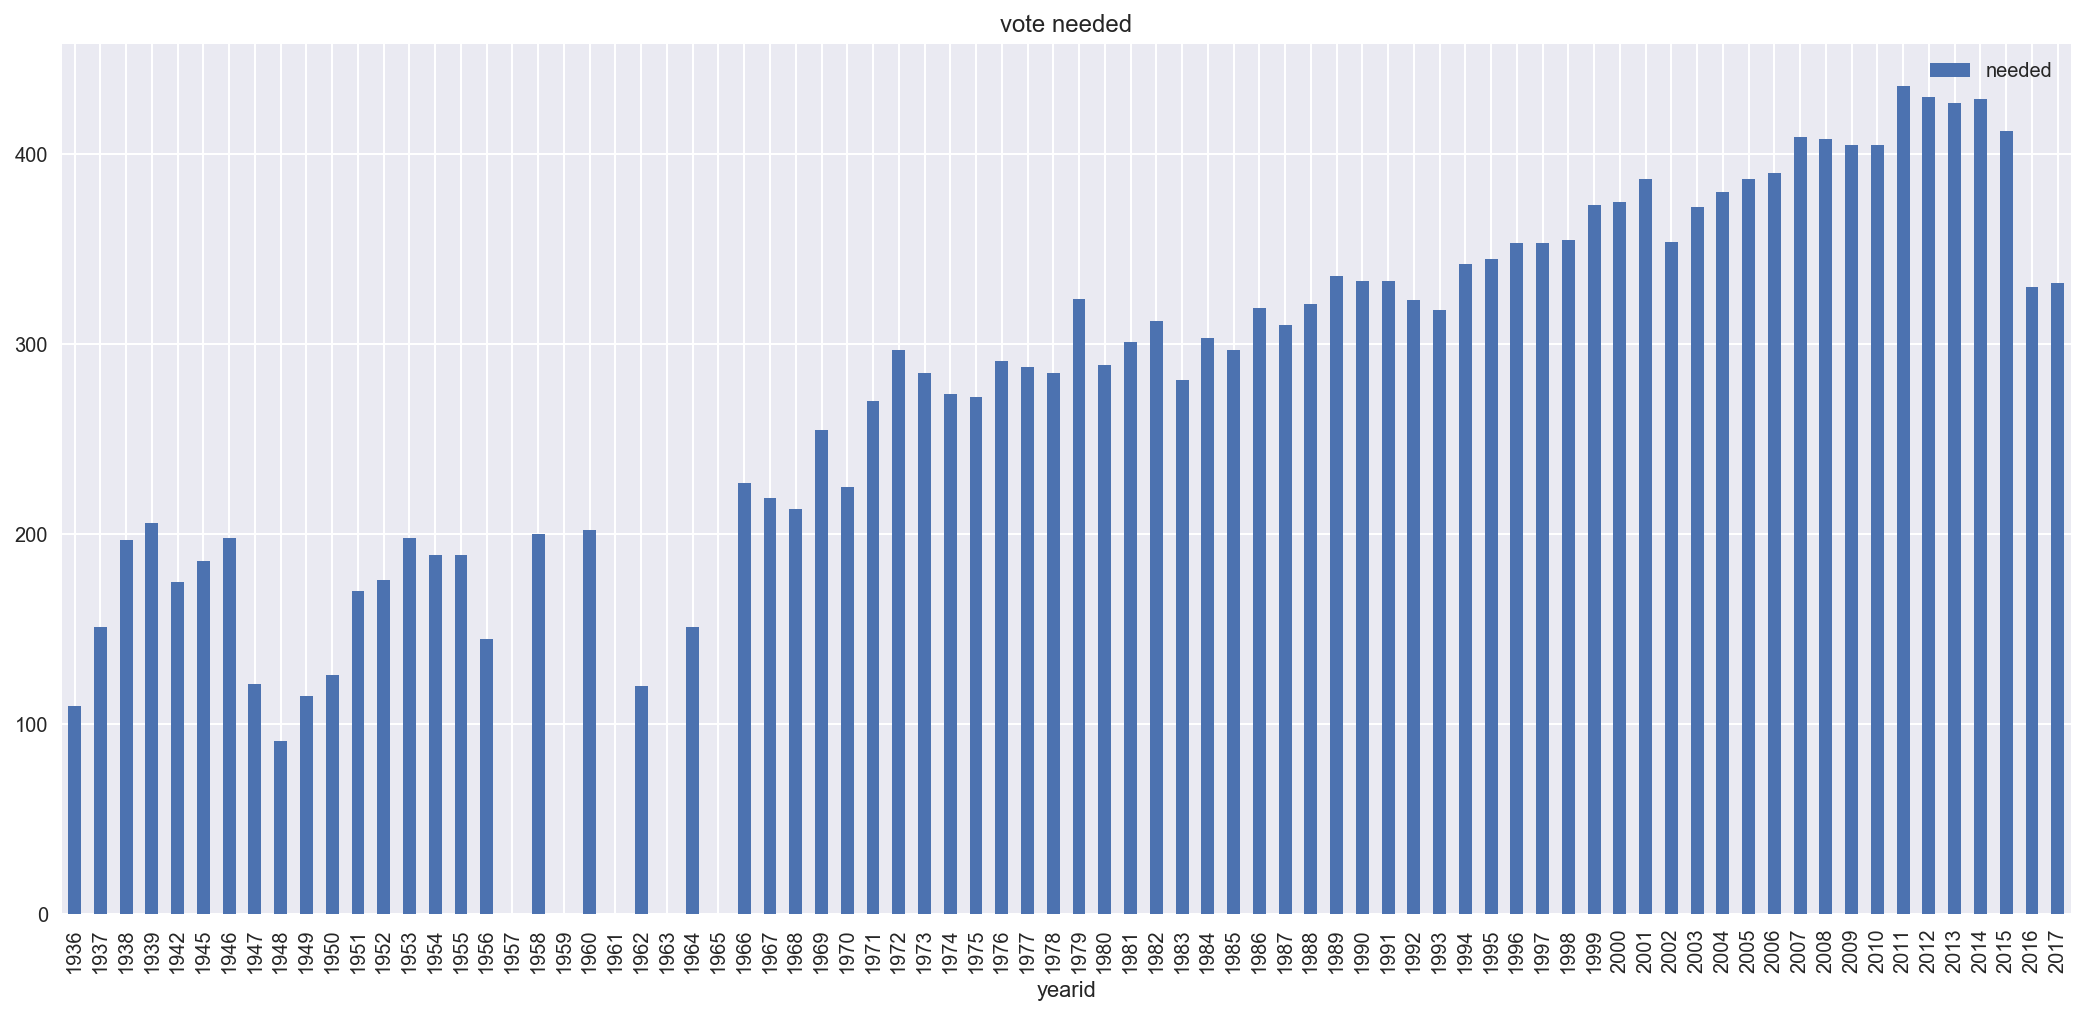

In [9]:
hall_of_fame[["yearid","needed"]].groupby("yearid").mean().fillna(0).plot.bar(figsize=(18,8),style = "o-",title="vote needed")

- ## Demographic Attribute

In [10]:
## read in player table
player = pd.read_csv("core/Master.csv",parse_dates=["debut","finalGame"])
player["serviceYear"] = player["finalGame"] - player["debut"]
# player["serviceYear"] = player.serviceYear.astype('timedelta64[D]')

## label the player whether they're enter into HOF
player = player.join(hall_of_fame[hall_of_fame.inducted == "Y"][["playerID","inducted"]].set_index("playerID"),\
                     on="playerID")
player.inducted.fillna("N",inplace=True)

print(player.info())
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 26 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null datetime64[ns]
finalGame       18910 non-null datetime64[ns]
retroID         19049 non-null object

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,serviceYear,inducted
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156 days,N
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,8209 days,Y
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,3456 days,N
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,4817 days,N
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,1676 days,N


### 5. Which name do people call most ? 
#### Name WordCloud
First, let's take it easy. Have a look at the first name players' most used. We see *John*, *Bill*, *Mike*, *Jim*,etc.. Do you feel interesting? Perhaps in each job, there may be a popular name.

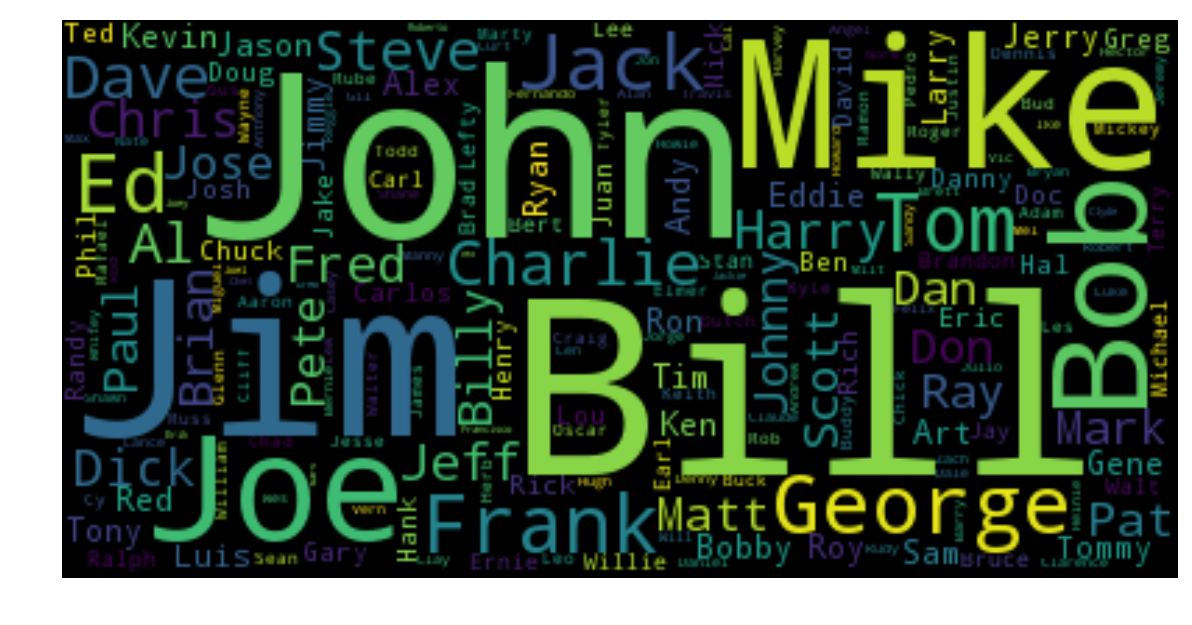

In [11]:
wordcloud=WordCloud().generate_from_frequencies(player.nameFirst.value_counts().to_dict())
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 6. Data Description
We find something intersting. About **1010** people only appear once in league, there first appear is their last game. We also find a strange things, at **row 11509**, the player's service year is a minus. That's a little weird.  
Average people, the **mean** of the service year is about **4.5** year and the person's **longest service year** is **35**.

In [12]:
player.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,serviceYear
count,18973.000000,18803.000000,18656.000000,9441.000000,9440.000000,9439.000000,18251.000000,18320.000000,18910
mean,1931.435356,6.629474,15.614816,1964.287364,6.483581,15.569552,186.375596,72.273799,1761 days 21:48:15.610787
std,41.555514,3.468103,8.750216,31.808030,3.529655,8.779552,21.524765,2.603904,1832 days 17:33:00.130745
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000,-4 days +00:00:00
25%,1895.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000,138 days 00:00:00
50%,1937.000000,7.000000,16.000000,1967.000000,6.000000,15.000000,185.000000,72.000000,1163 days 00:00:00
75%,1969.000000,10.000000,23.000000,1990.000000,10.000000,23.000000,200.000000,74.000000,2931 days 00:00:00
max,1996.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,320.000000,83.000000,12862 days 00:00:00


In [13]:
player[player["serviceYear"] < pd.Timedelta("1 days")].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,serviceYear,inducted
20,abercda01,1850.0,1.0,2.0,USA,OK,Fort Towson,1939.0,11.0,11.0,USA,PA,Philadelphia,Frank,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,1871-10-21,aberd101,abercda01,0 days,N
22,abernbi01,1929.0,1.0,30.0,USA,CA,Torrance,2006.0,2.0,19.0,USA,CA,Yucaipa,Bill,Abernathie,William Edward,190.0,70.0,R,R,1952-09-27,1952-09-27,aberb101,abernbi01,0 days,N
76,adamsji01,1868.0,NaN,NaN,USA,IL,East St. Louis,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Adams,James J.,148.0,66.0,NaN,R,1890-04-21,1890-04-21,adamj101,adamsji01,0 days,N
77,adamsjo01,1877.0,10.0,28.0,USA,IL,Cowden,1952.0,10.0,8.0,USA,MO,Bachelor,Joe,Adams,Joseph Edward,190.0,72.0,R,L,1902-04-26,1902-04-26,adamj102,adamsjo01,0 days,N
107,adkinhe01,1874.0,1.0,19.0,USA,MO,Fulton,1953.0,1.0,2.0,USA,MO,Mexico,Harry,Atkinson,John Harry,NaN,NaN,NaN,NaN,1895-09-25,1895-09-25,adkih101,adkinhe01,0 days,N


### 7. problem data finding 
When we do some data exploration, we always have some snoop.  
OK, you see we find some problem data.  
A player's finalGame time is earlier than the debut time, that's surprsing.

In [14]:
player[player["serviceYear"] < pd.Timedelta("0 days")]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,serviceYear,inducted
11509,menzete01,1897.0,11.0,4.0,USA,MO,St. Louis,1969.0,12.0,23.0,USA,MO,St. Louis,Ted,Menze,Theodore Charles,172.0,69.0,R,R,1918-04-27,1918-04-23,menzt101,menzete01,-4 days,N


### 8. Who play the longest time ? 
#### Do you have some interesting in who play the longest time in the baseball career?
This one, Altrock Nicholas, serves about 30yrs, but he hasn't been admitted into the Hall Of Fame.

In [15]:
player.loc[player["serviceYear"].argmax()]

playerID                  altroni01
birthYear                      1876
birthMonth                        9
birthDay                         15
birthCountry                    USA
birthState                       OH
birthCity                Cincinnati
deathYear                      1965
deathMonth                        1
deathDay                         20
deathCountry                    USA
deathState                       DC
deathCity                Washington
nameFirst                      Nick
nameLast                    Altrock
nameGiven                  Nicholas
weight                          197
height                           70
bats                              B
throws                            L
debut           1898-07-14 00:00:00
finalGame       1933-10-01 00:00:00
retroID                    altrn101
bbrefID                   altroni01
serviceYear     12862 days 00:00:00
inducted                          N
Name: 266, dtype: object

### 9. Does there any relationship bewteen the year they play and be admitted into the Hall Of Fame?
We see that, the one enter into the hall of fame the youngest only just appear in one game, maybe there's some amazing reason behind it. We found that **1** people become the baseball hero used **less than 1 year**. Most of the player have their pass need average **17 years** fight. 

In [16]:
player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]').describe()

count    224.000000
mean      17.330357
std        4.138604
min        0.000000
25%       15.000000
50%       17.500000
75%       20.000000
max       32.000000
Name: serviceYear, dtype: float64

In [17]:
player[player.inducted == "Y"][player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]')<1]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,serviceYear,inducted
2075,brownwi02,1915.0,6.0,26.0,USA,LA,Shreveport,1996.0,8.0,4.0,USA,TX,Houston,Willard,Brown,Willard Jessie,200.0,71.0,R,R,1947-07-19,1947-08-17,broww101,brownwi02,29 days,Y


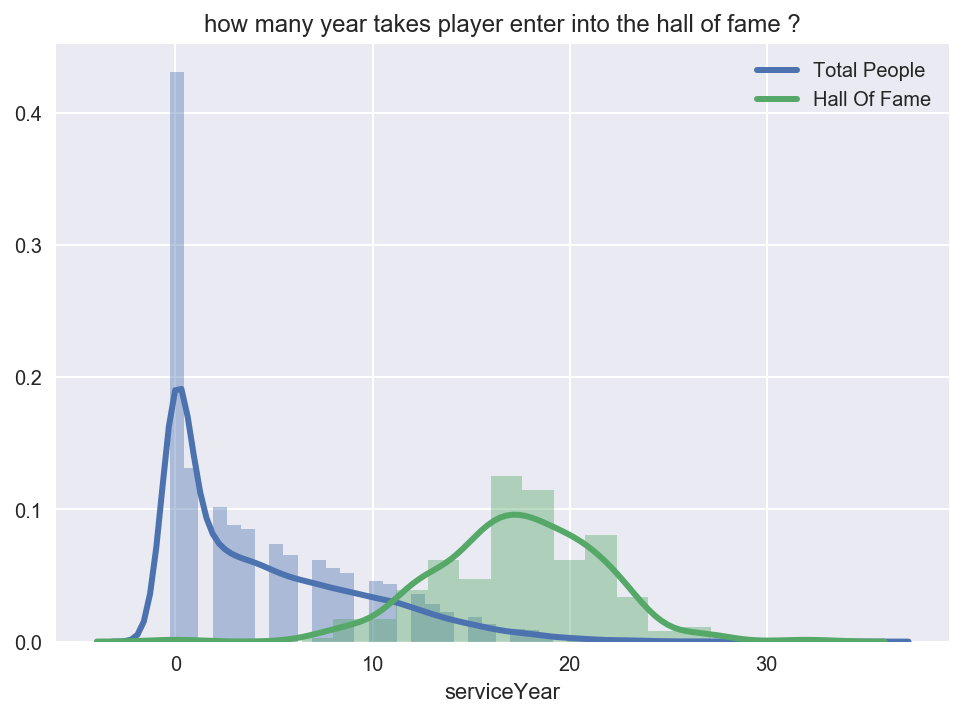

In [18]:
sns.distplot(player.serviceYear.astype('timedelta64[Y]').dropna(),\
            kde_kws={"lw":3,"label":"Total People"})
g = sns.distplot(player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]').dropna(),\
             kde_kws={"lw": 3, "label": "Hall Of Fame"})
g.set_title("how many year takes player enter into the hall of fame ?")

### 10. The Height and The Weight
From the fig, we can see that the **mean** of the height is about **70** inches and the **mean** of the weight is **186** pounds. They all follow pretty normal distribution.

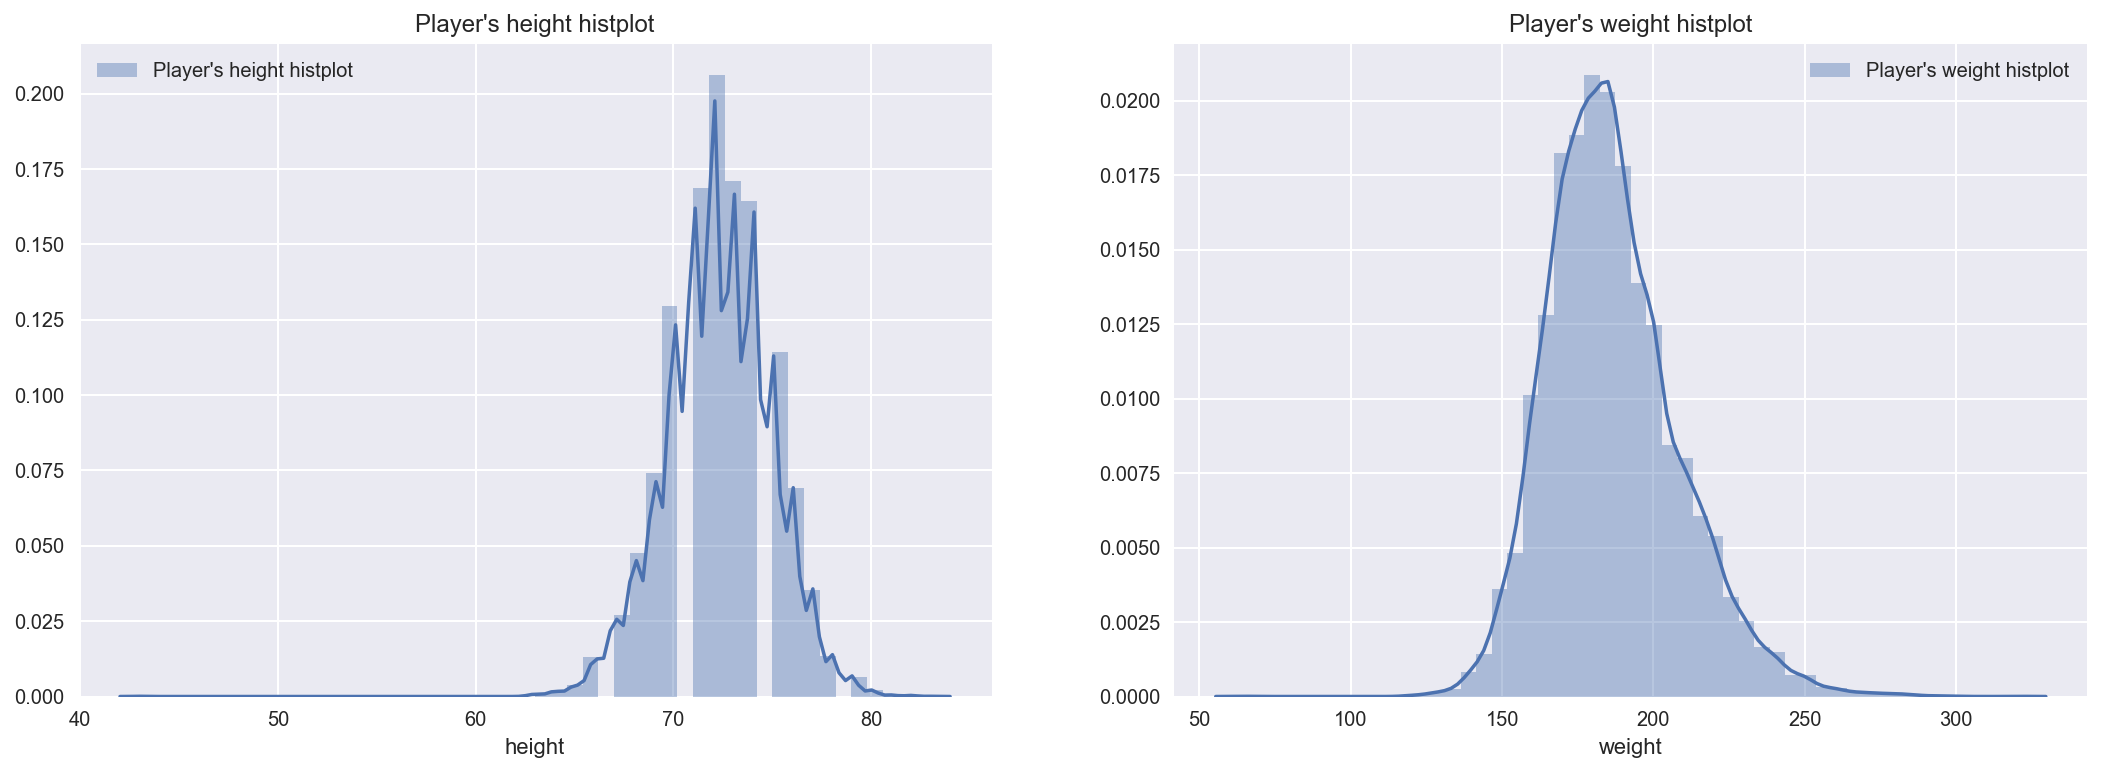

In [19]:
fig,axes_w_h = plt.subplots(1,2,figsize=(18,6))
sns.distplot(player["height"].dropna(),ax=axes_w_h[0],hist_kws={"label":"Player's height histplot"})
axes_w_h[0].set_title("Player's height histplot")
axes_w_h[0].legend()
sns.distplot(player["weight"].dropna(),ax=axes_w_h[1],hist_kws={"label":"Player's weight histplot"})
axes_w_h[1].set_title("Player's weight histplot")
axes_w_h[1].legend()

We can really see some pattern here. The ones chosen for the hall of fame. Their height and weight are in the center of the players. Maybe that's much more close to public aesthetics. Maybe they are not the best player. That need further validate.

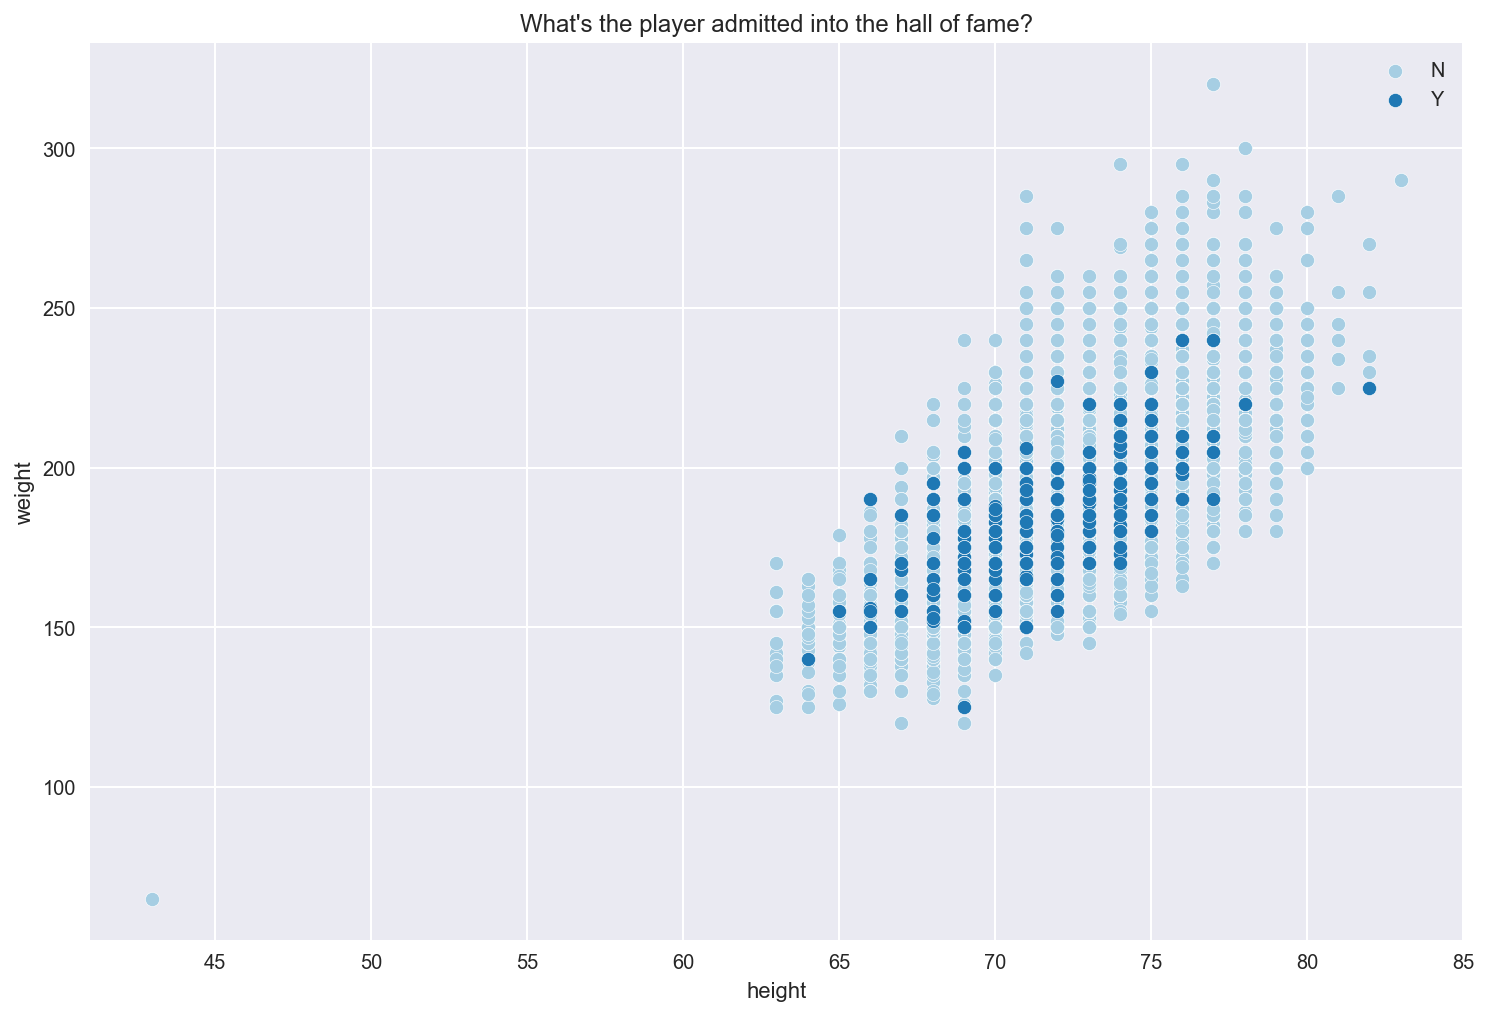

In [20]:
g = sns.FacetGrid(player, hue="inducted", size=7,aspect=1.5,palette=sns.color_palette(sns.color_palette("Paired")))
g.map(plt.scatter, "height", "weight", s=50, edgecolor="white")
plt.title("What's the player admitted into the hall of fame?")
plt.legend()

# Batting 

In [21]:
batting = pd.read_csv("core/Batting.csv")

print(batting.info())
batting.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB
None


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [23]:
### label batting data with inducted groupby playerID
player_batting = batting.groupby("playerID").sum().iloc[:,2:].fillna(0)
player_batting["BA"] = player_batting["H"].div(player_batting["AB"],fill_value=0)
player_batting = player_batting.join(player[["playerID","inducted"]].set_index("playerID"))

### 11. What about batting statics correlations?
From the pair plot, we can see some interesting pattern:
1. the more **game** people play, the more **hit** they get.
2. the more **game** people play, the more **double hit** they get.
3. there's clearly positive relationship between **hit** and **double hit**.
4. we don't clearly see relations in **triple hit** and **home run**.

Beautiful heatmap talks all.

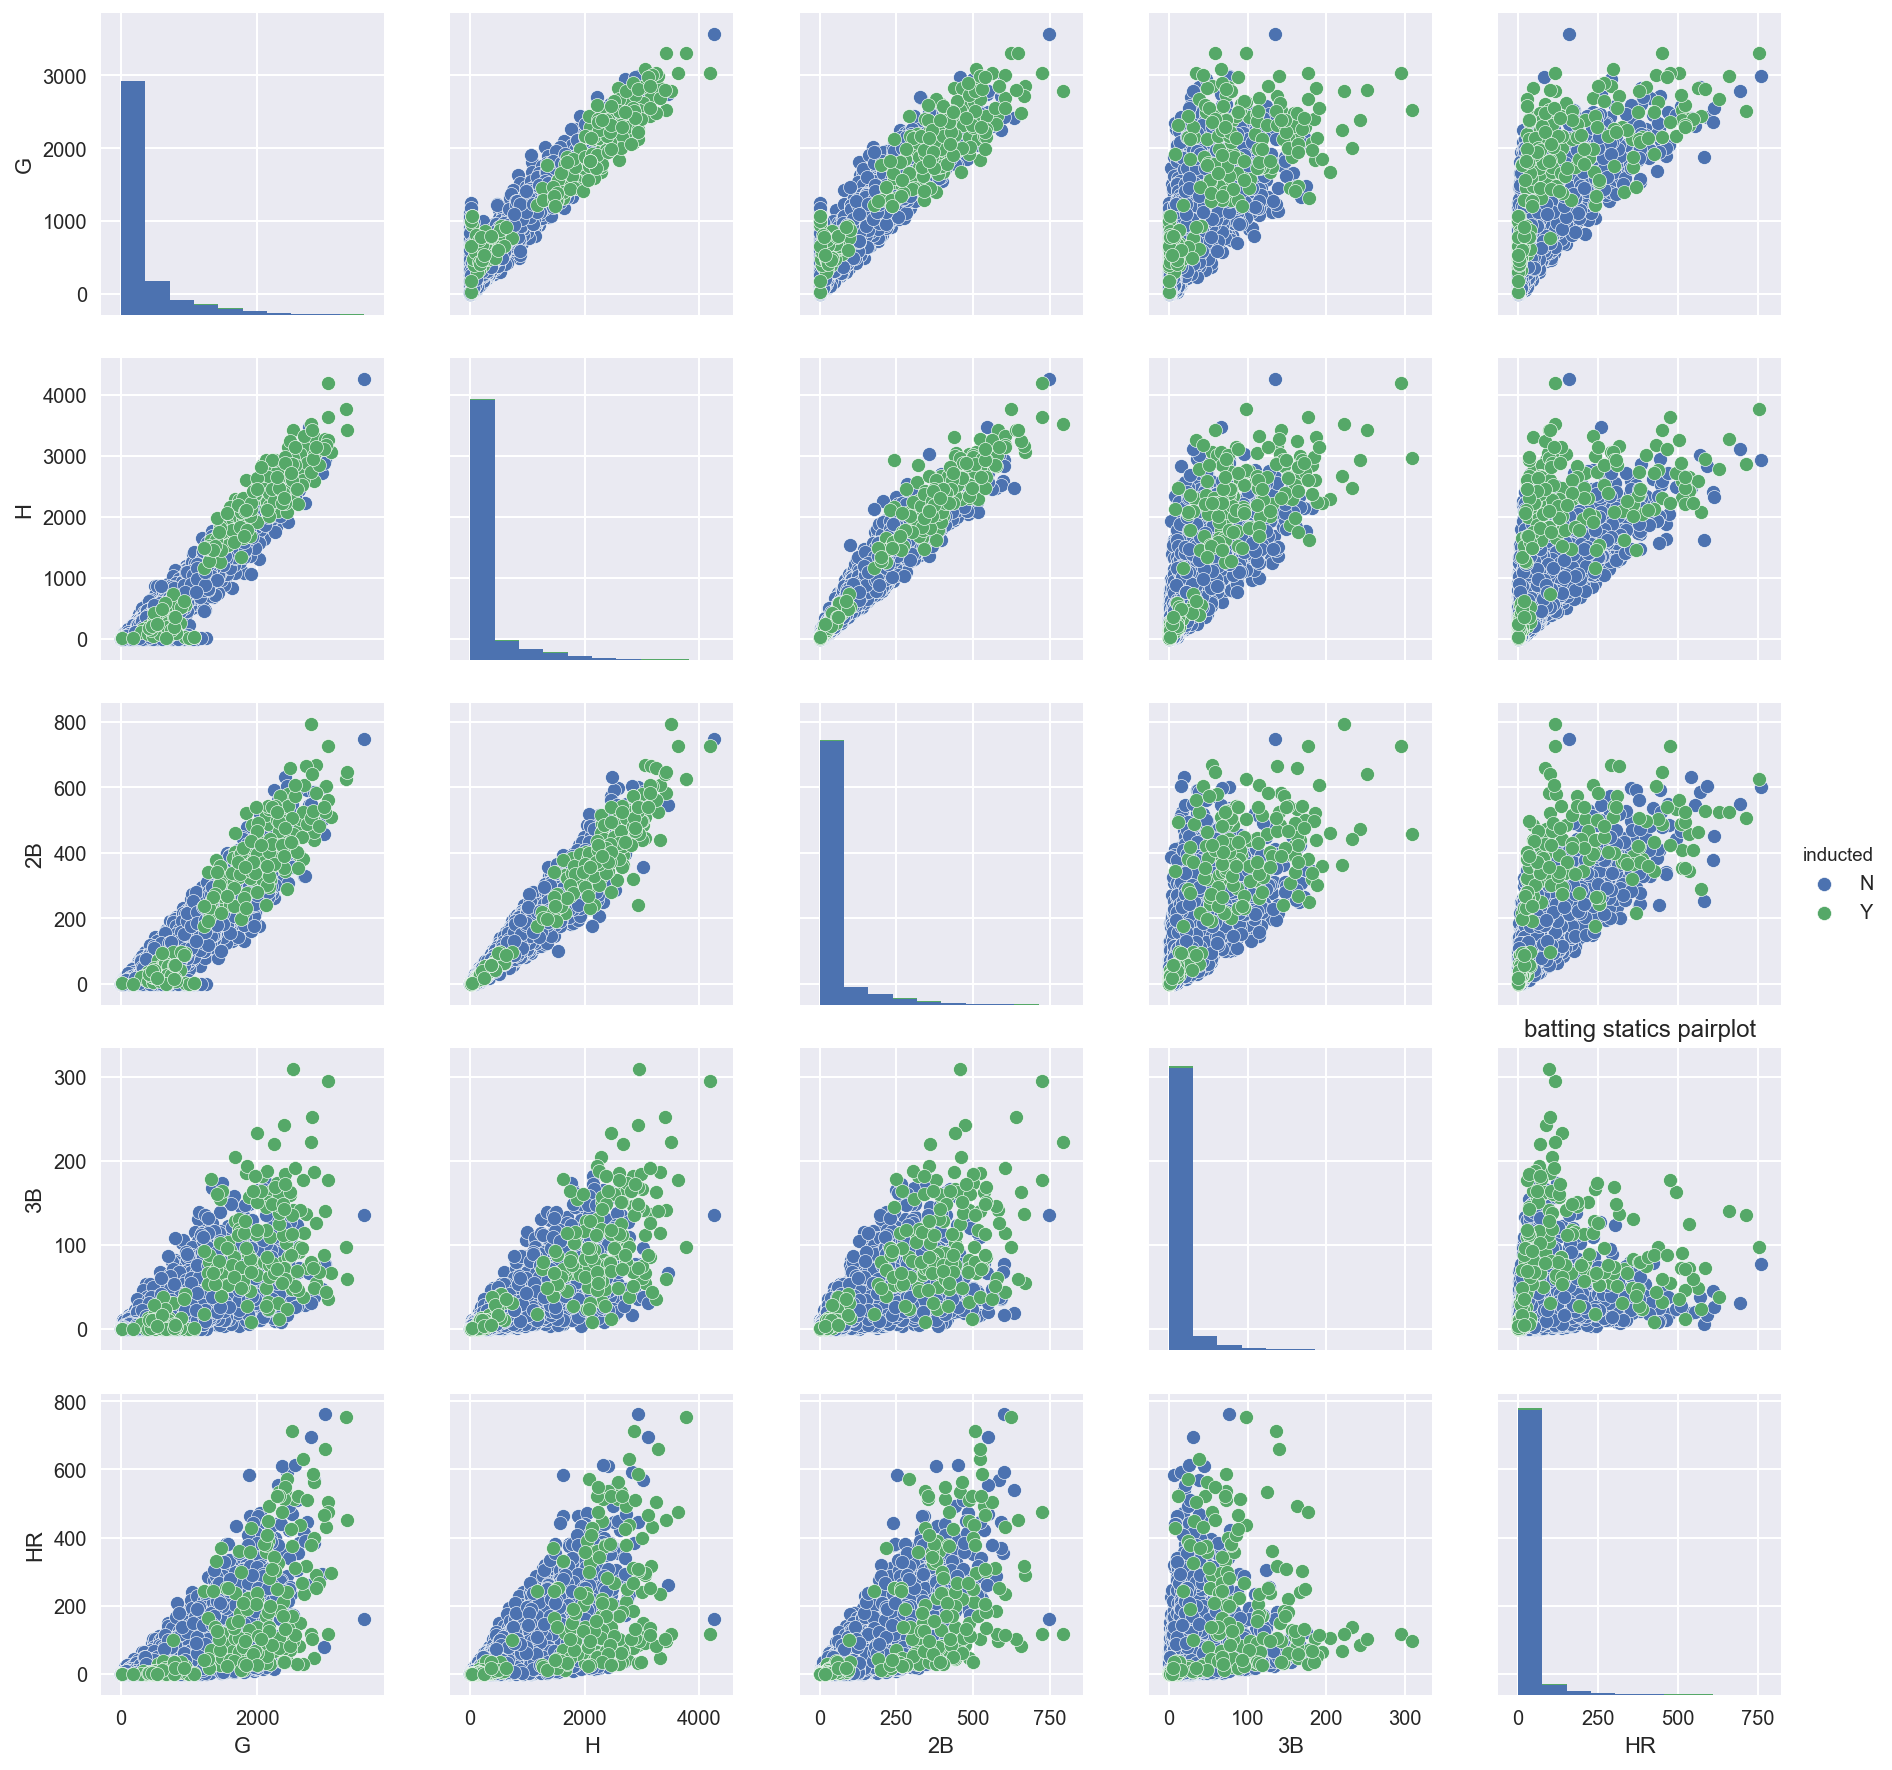

In [24]:
g = sns.pairplot(player_batting,vars=["G","H","2B","3B","HR"],hue="inducted")
g.set(alpha=0.3)
plt.title("batting statics pairplot")

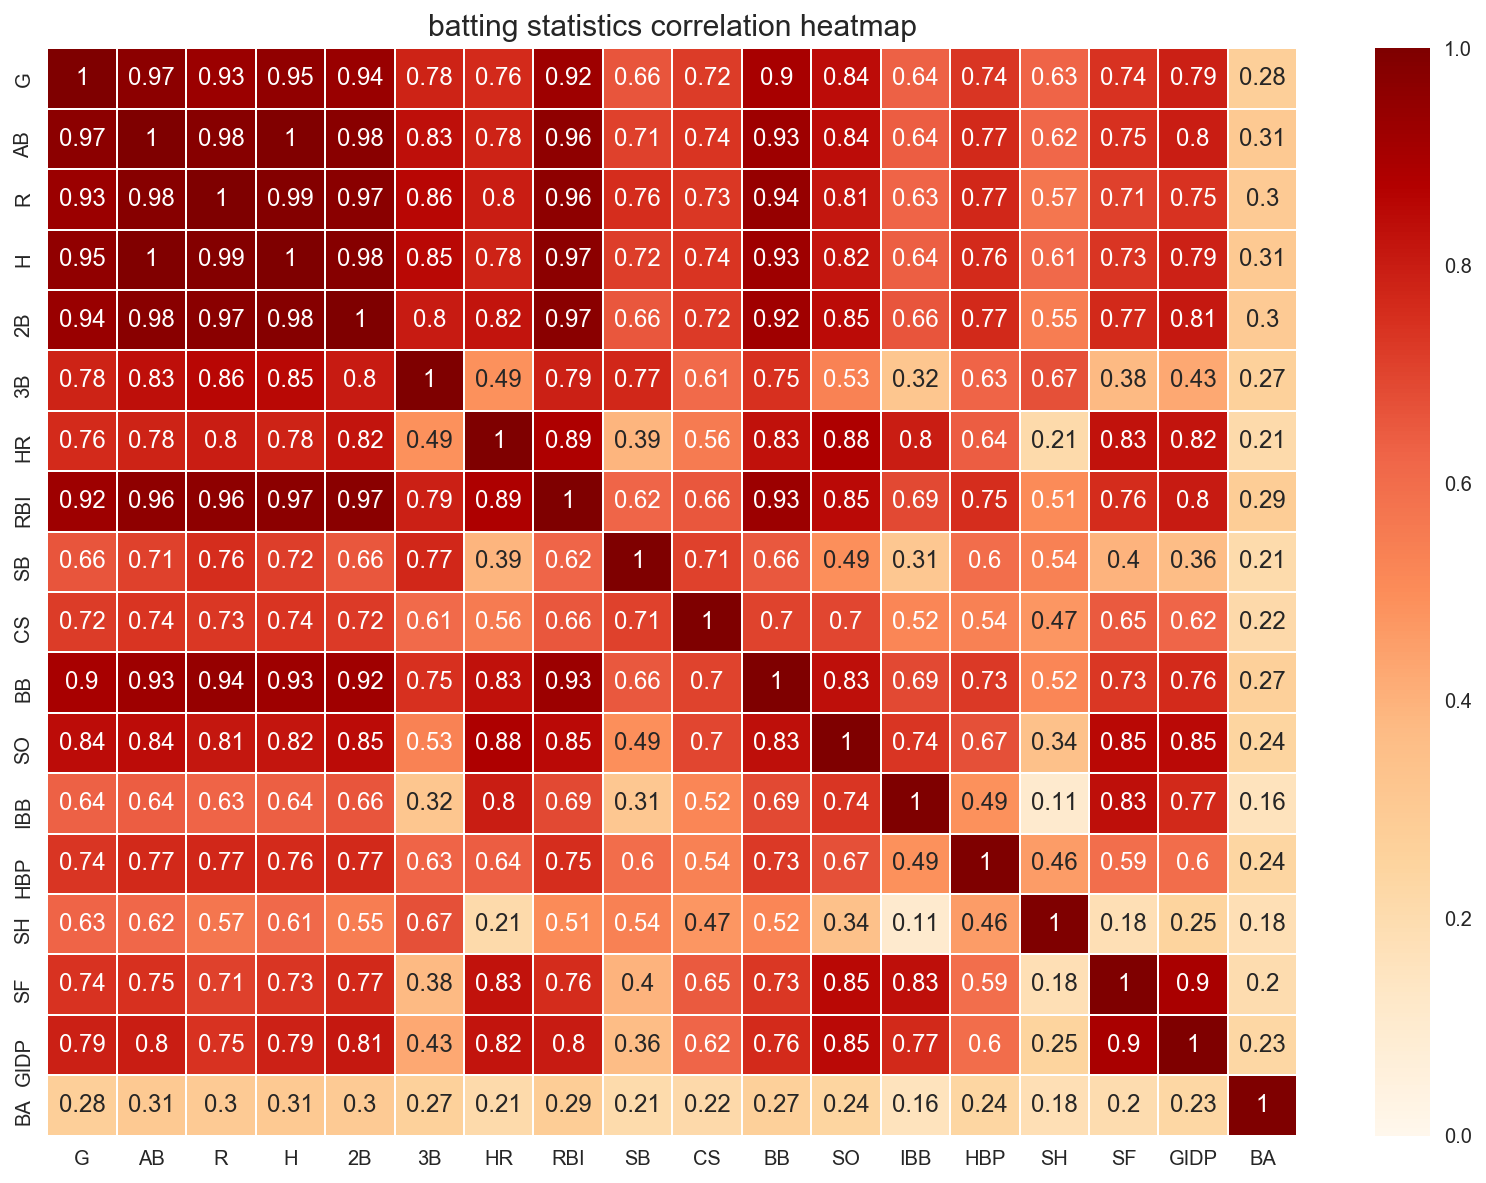

In [25]:
plt.figure(figsize=(14,10))
g = sns.heatmap(player_batting.corr(),vmin=0,vmax=1,linewidths=.5,cmap="OrRd",annot=True)
g.set_title("batting statistics correlation heatmap",fontdict={"fontsize":15})

### 13. batting skill compare
From the boxplot, we can see almost all the statistics feature in batting, the player admitted in hall of fame is above than the ones not admitted. 

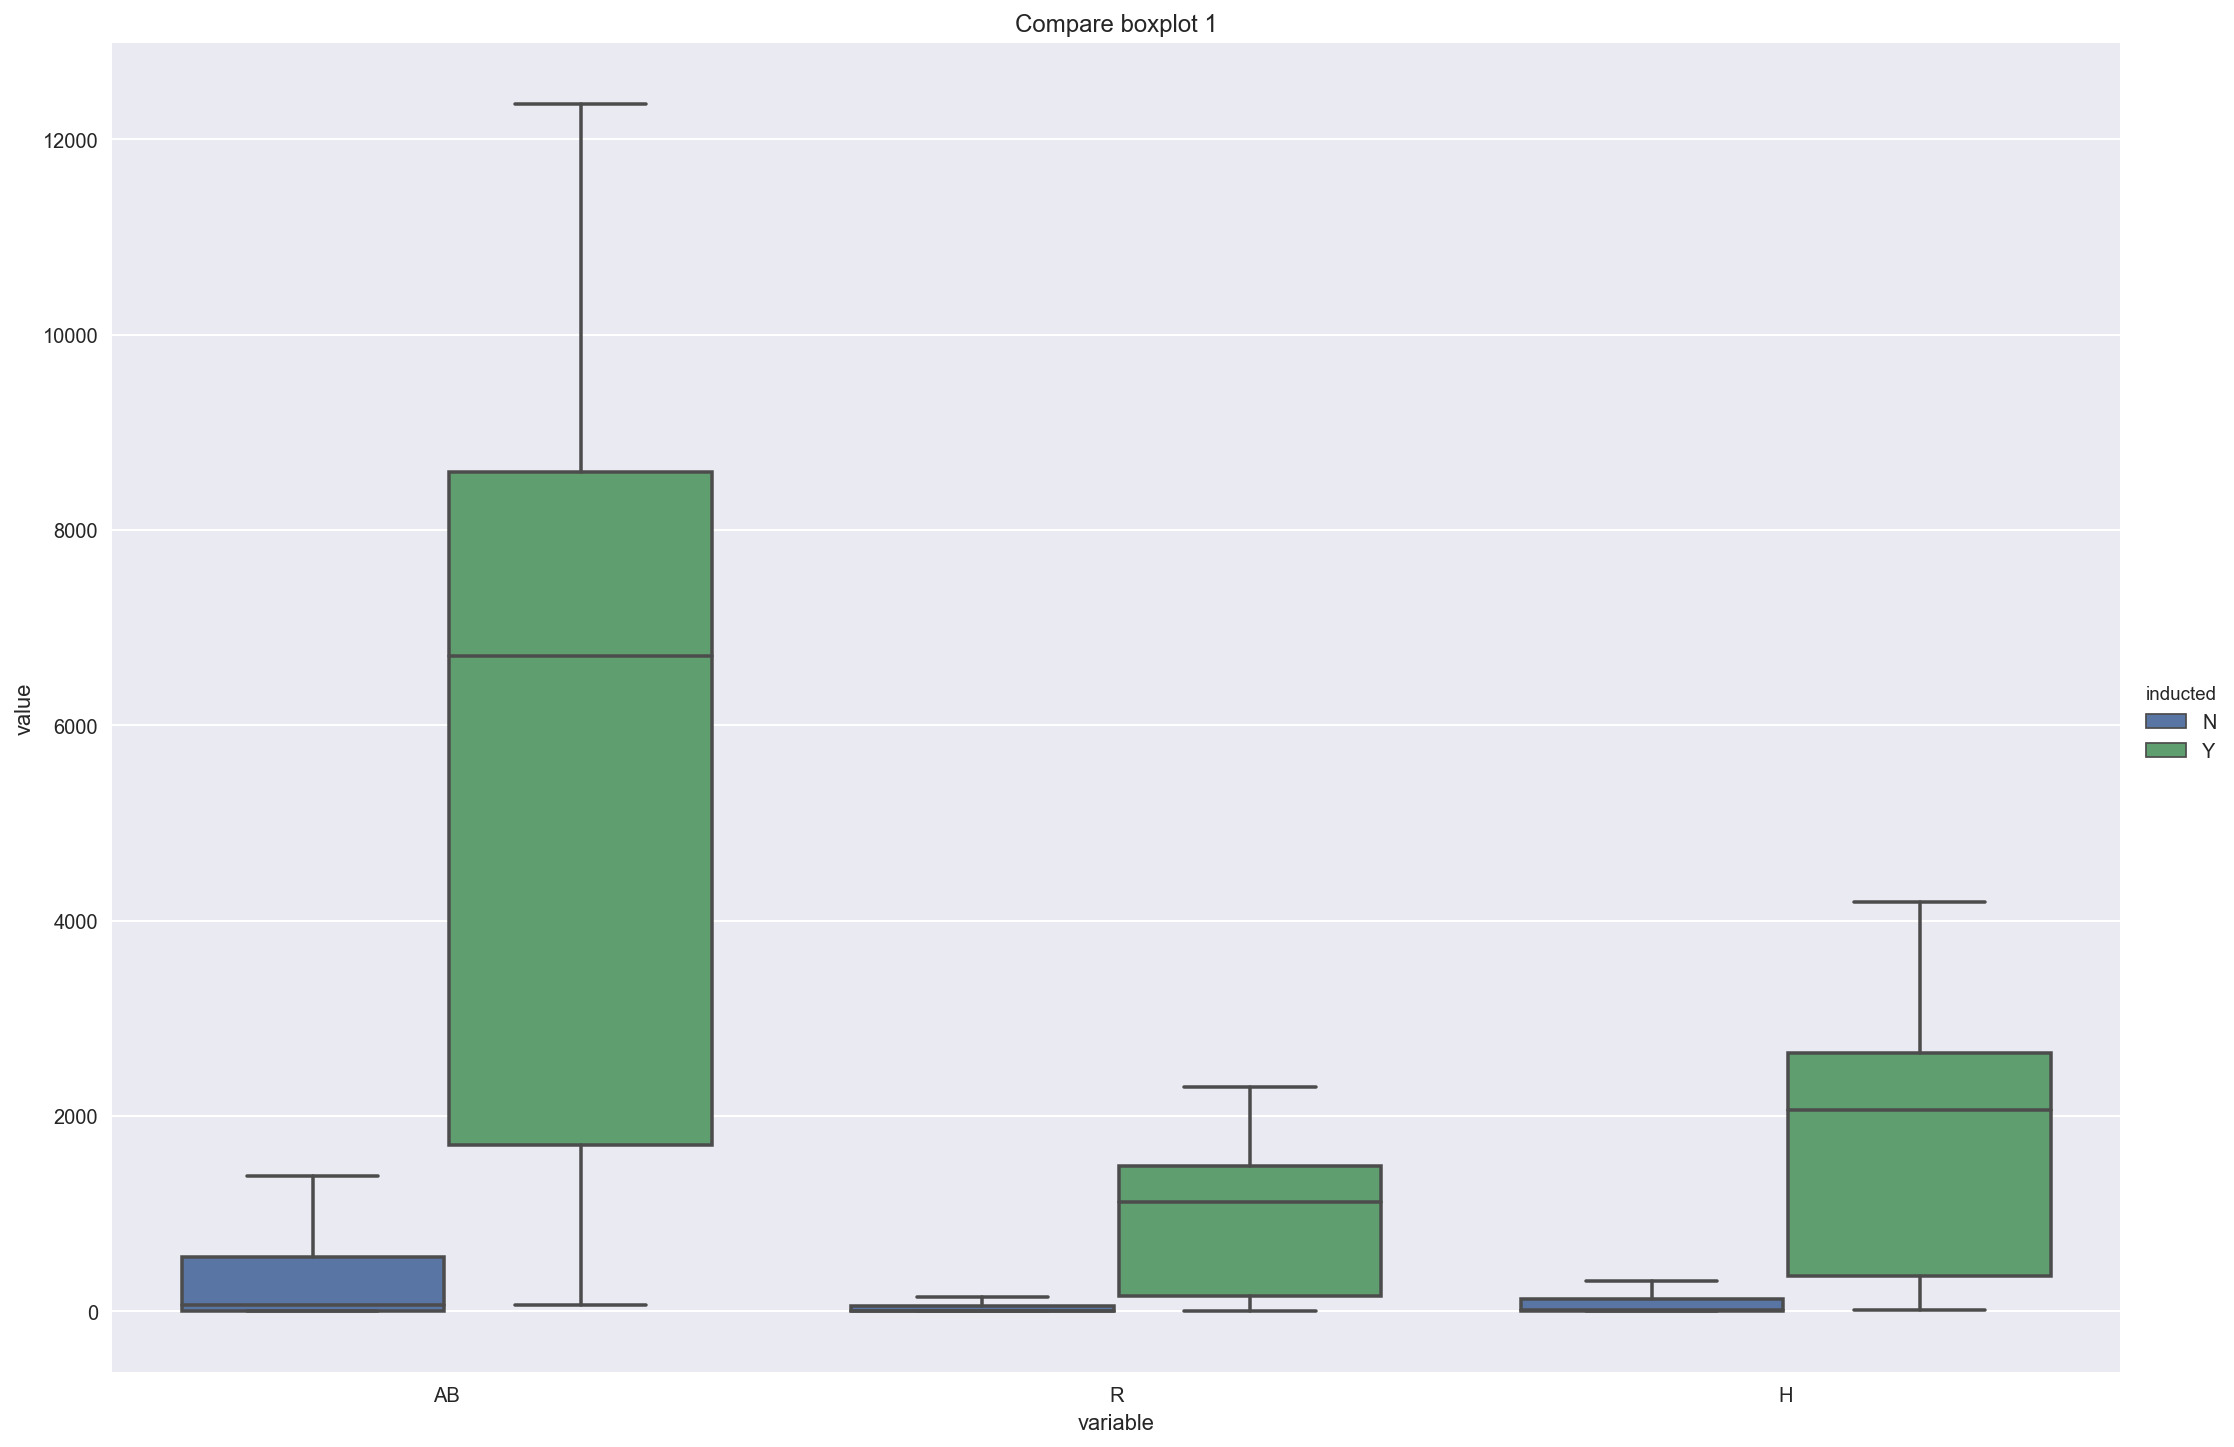

In [26]:
sns.factorplot(x="variable",y="value",hue="inducted",\
               data = pd.melt(player_batting[["AB","R","H","inducted"]],id_vars="inducted"),\
               kind="box",size=10,aspect=1.5,showfliers=False)
plt.title("Compare boxplot 1")

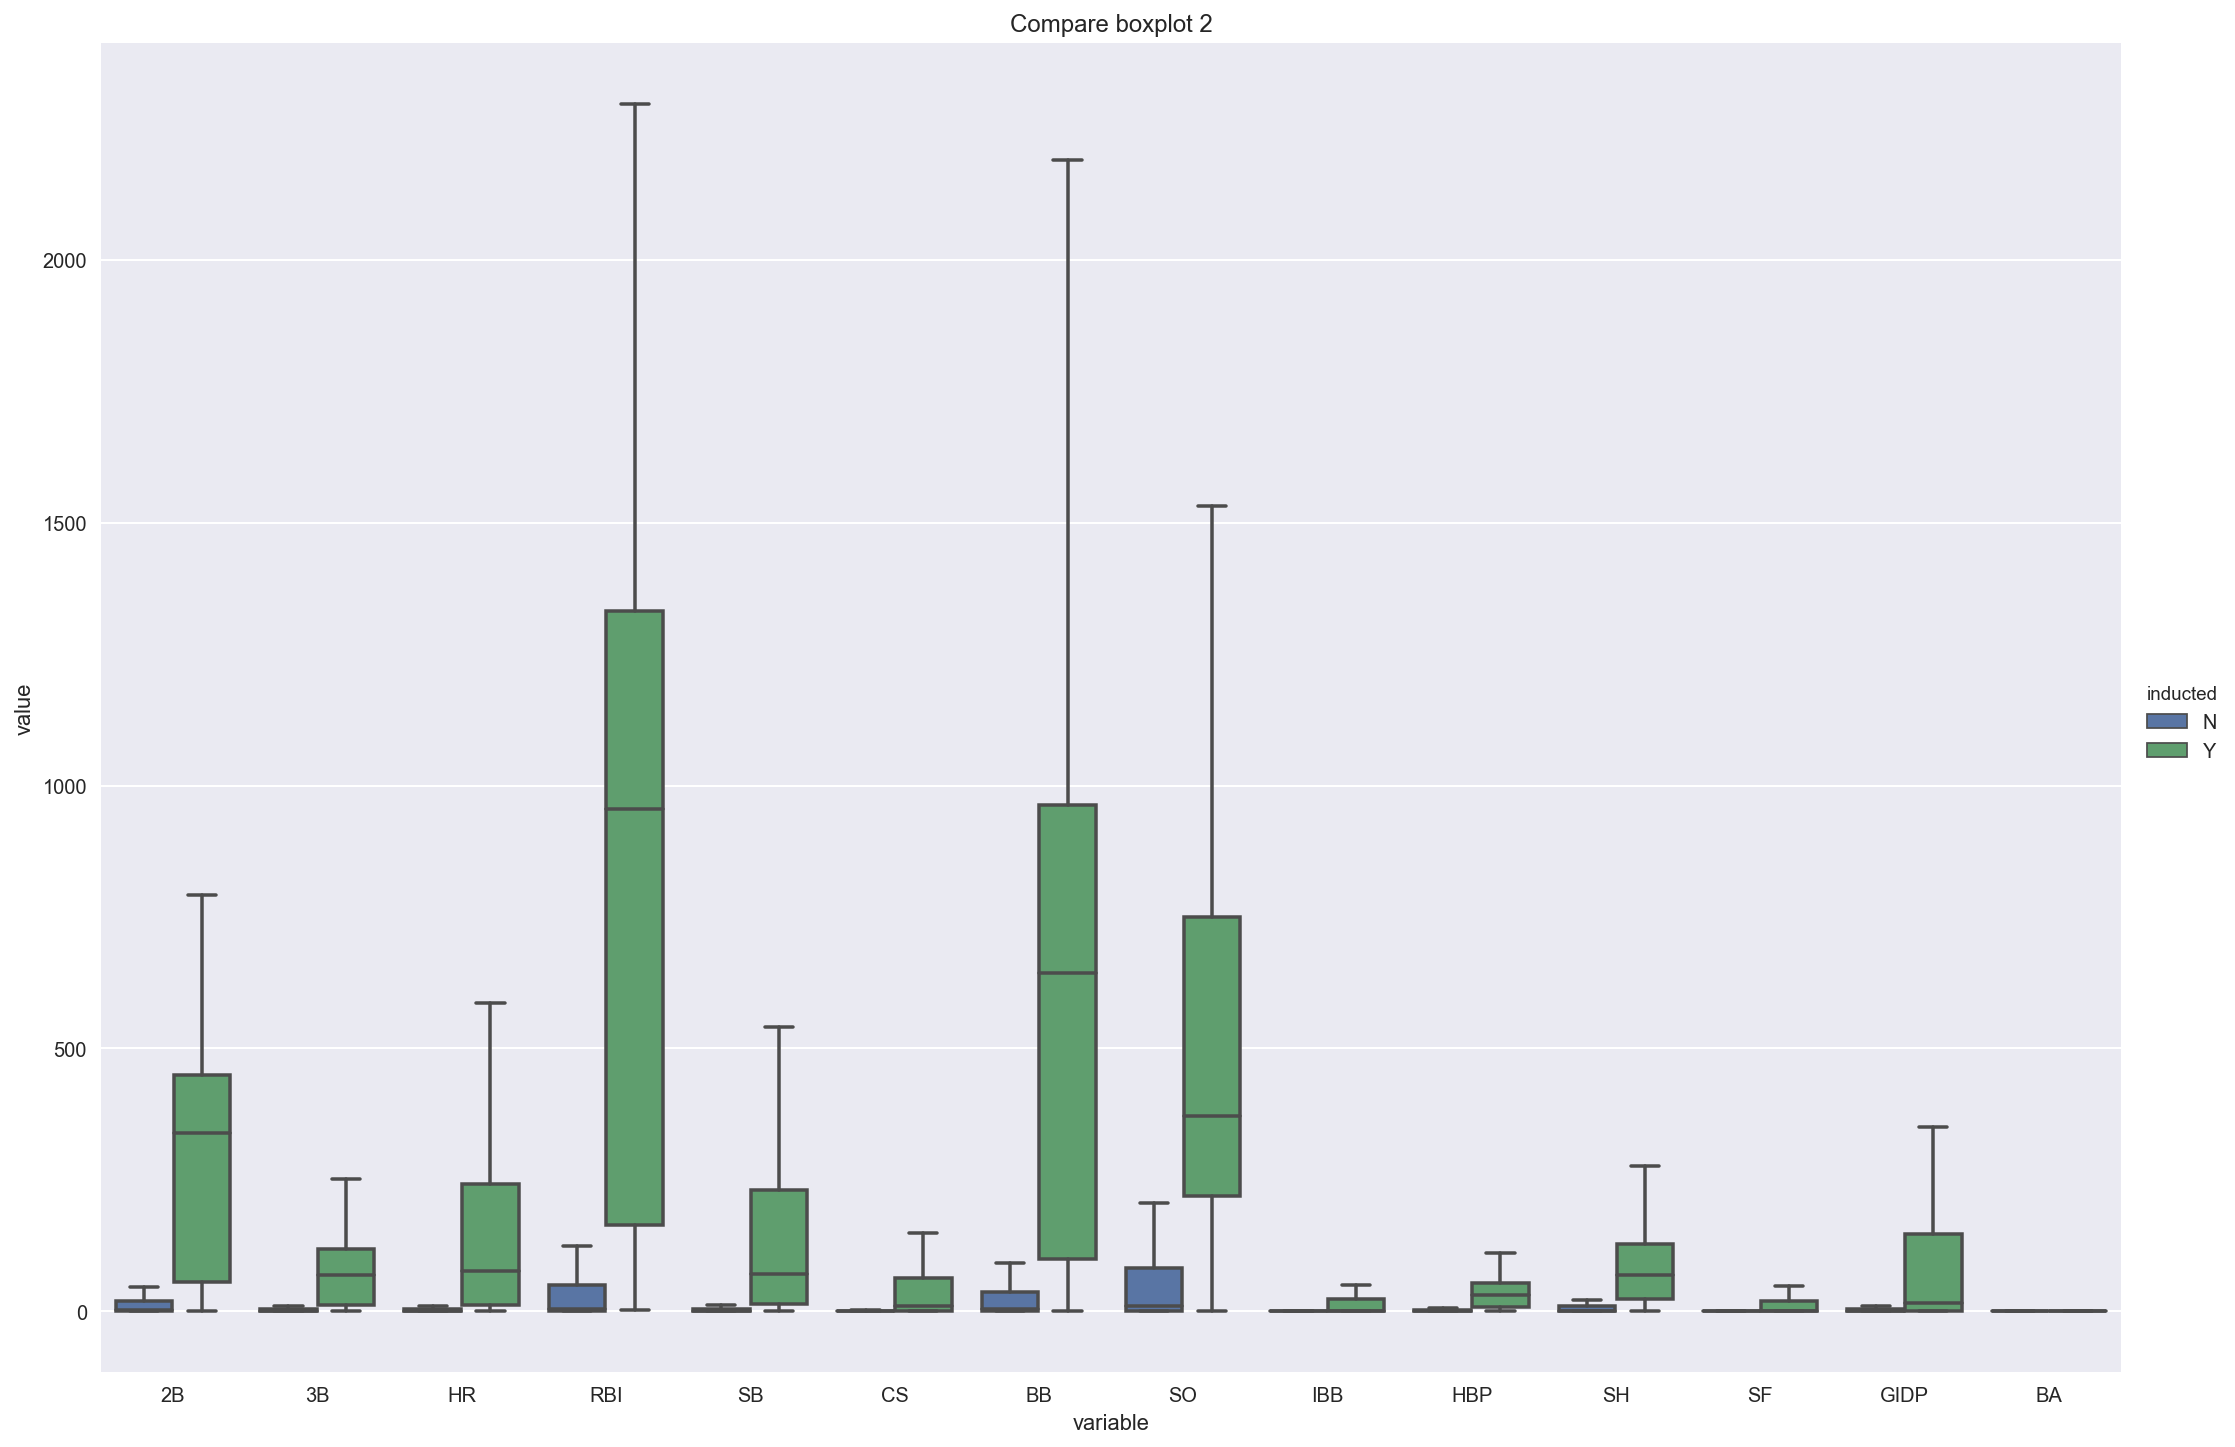

In [27]:
sns.factorplot(x="variable",y="value",hue="inducted",data = pd.melt(player_batting.iloc[:,4:],id_vars="inducted")\
               ,kind="box",size=10,aspect=1.5,showfliers=False)
plt.title("Compare boxplot 2")

### batting average
**batting average** is an important score to evalue a player, we can see clear different between the player in Hall Of Fame and the ones are not

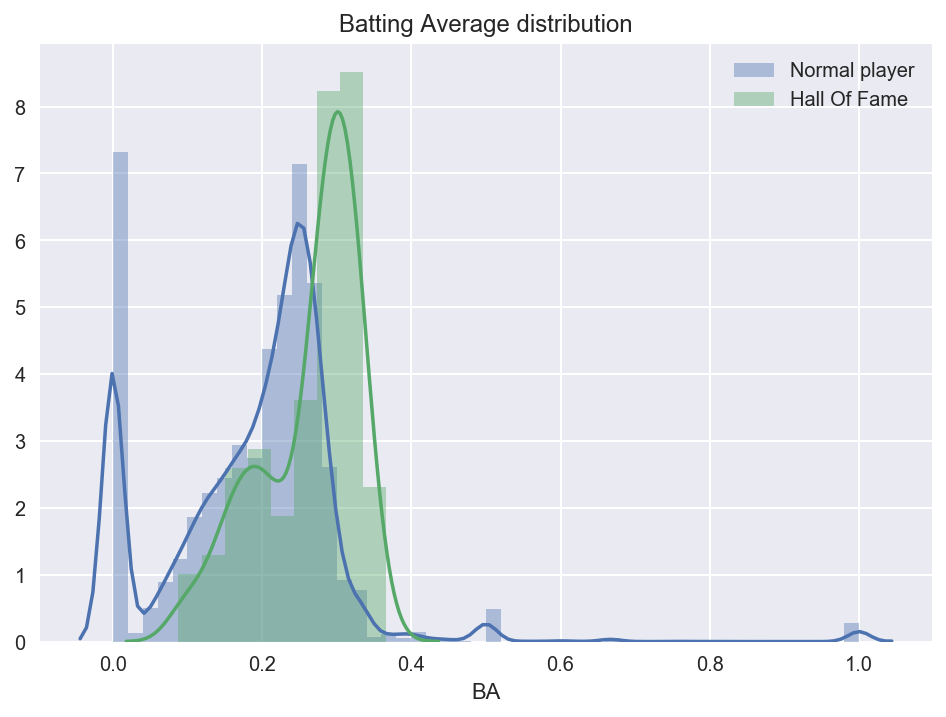

In [28]:
### batting average
sns.distplot(player_batting[player_batting["inducted"] == "N"].BA.dropna(),label= "Normal player")
g = sns.distplot(player_batting[player_batting["inducted"] == "Y"].BA.dropna(),label= "Hall Of Fame")
g.set_title("Batting Average distribution")
plt.legend()

## Salary 
---  
From the input data, we see only less than 1/4 that the salary is not null to the player.

In [29]:
## read in salary data
salary = pd.read_csv("./core/Salaries.csv")
### join salary to player table
player = player.join(salary.groupby(["playerID"])[["playerID","salary"]].mean(),on="playerID")
print(salary.info())
salary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
None


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [30]:
salary.playerID.describe()

count         26428
unique         5155
top       moyerja01
freq             25
Name: playerID, dtype: object

### Salary time-series plot
We can see the salary boom with the time. The barplot show the relationship between the median salary of the year and the time. From the in increasing, this could mean two things:
- the bigger cake of the baseball game 
- inflation

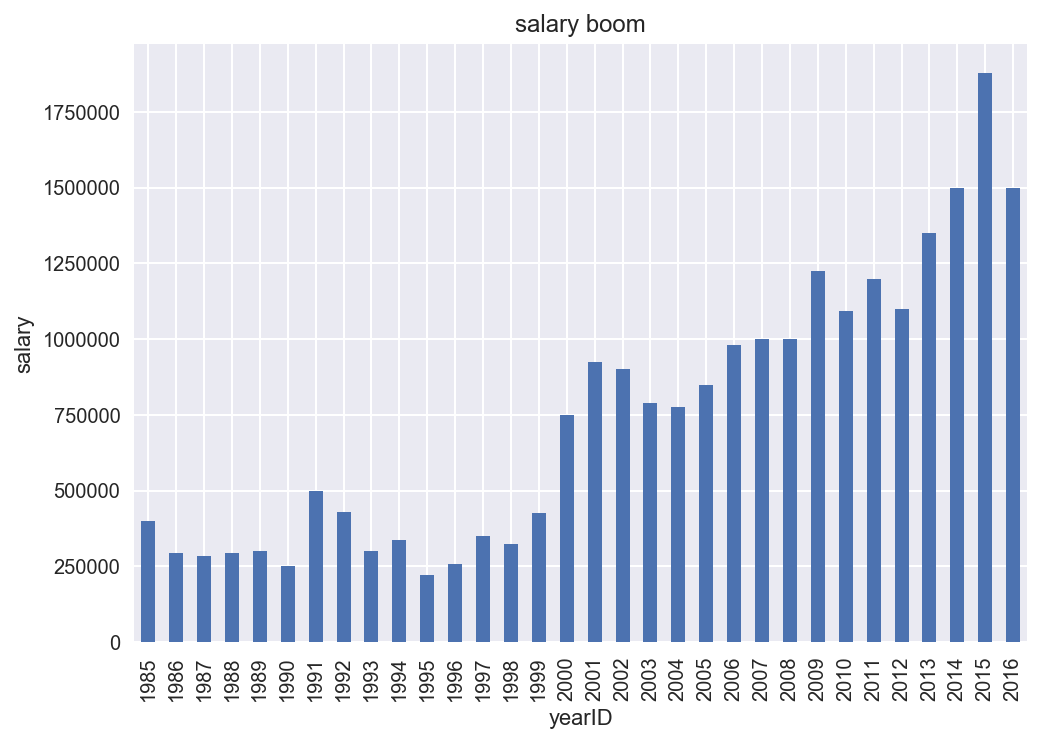

In [31]:
g = salary.groupby(["yearID"]).salary.median().plot.bar(title="salary boom")
g.set_ylabel("salary")

### 14. Salary difference between the normal player and Hall Of Fame  
There's a clearly difference between the player admitted into the Hall Of Fame and the normal person.
However,there're really enough outliers in the one not in HOF. In other words, they have very high salary, but that's not enough to let them enter into the HOF. At last, we could conclude that having high salary will give the player higher possibility admitted into HOF.

In [32]:
player.salary.describe()

count    5.147000e+03
mean     1.186343e+06
std      1.837999e+06
min      6.000000e+04
25%      2.684220e+05
50%      5.075000e+05
75%      1.219962e+06
max      2.200000e+07
Name: salary, dtype: float64

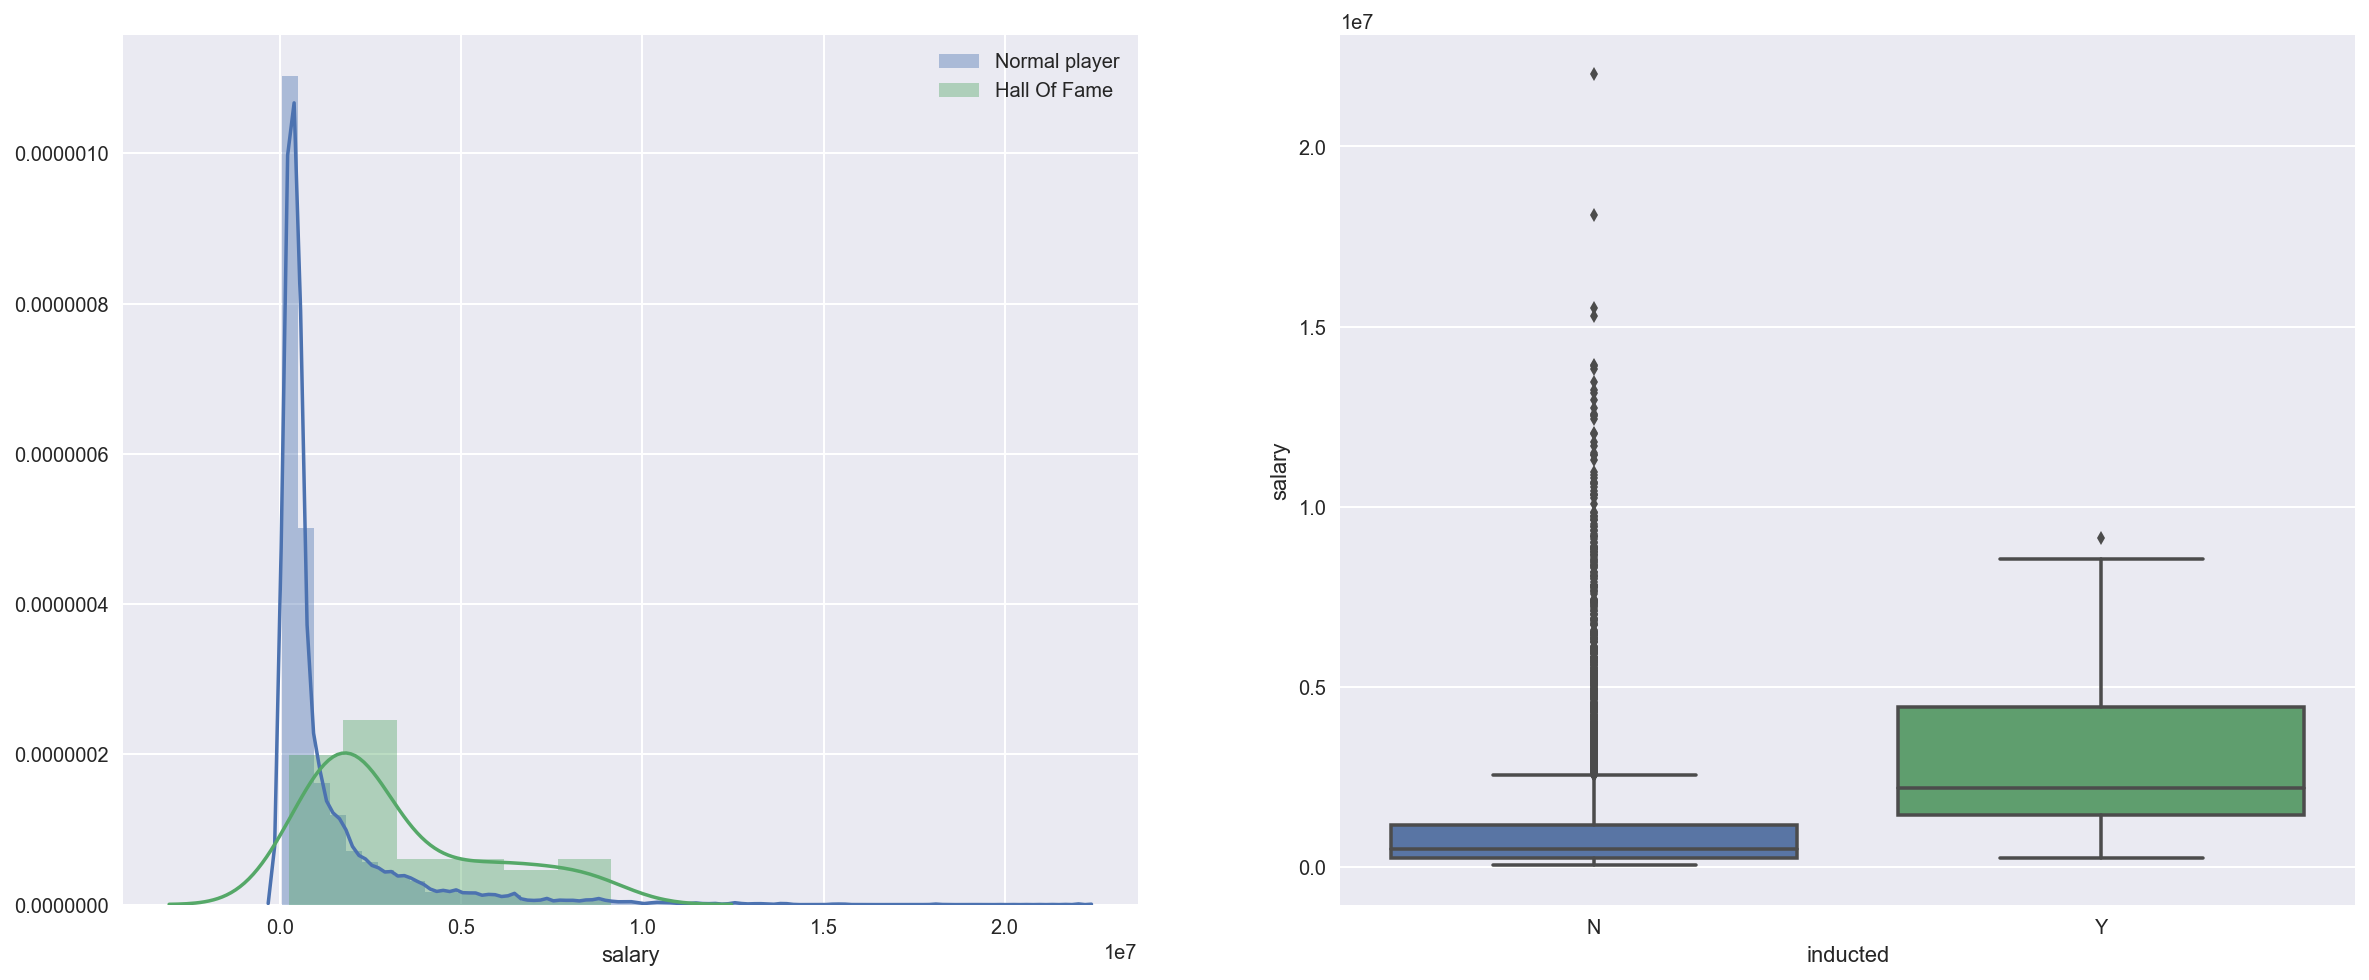

In [33]:
fig,axes_salary = plt.subplots(1,2,figsize=(20,8))
sns.distplot(player[player["inducted"] == "N"].salary.dropna(),label= "Normal player",ax=axes_salary[0])
sns.distplot(player[player["inducted"] == "Y"].salary.dropna(),label= "Hall Of Fame",ax=axes_salary[0])
g = sns.boxplot(x="inducted",y="salary",data=player,ax=axes_salary[1])
axes_salary[0].legend()


## Awards
---  
Only less than 1/10 player were awarded, let's check their relationship with the HOF.



In [34]:
### read in award data
awards = pd.read_csv("./core/AwardsPlayers.csv")
### label player with inducted data
awards = awards.join(player[["playerID","inducted"]].set_index("playerID"),on="playerID")
award_count = awards.groupby("playerID").size()
award_count.name = "award_count"
### label the number of awards to payer table
player = player.join(award_count,on="playerID")
print(awards.info())
awards.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 7 columns):
playerID    6158 non-null object
awardID     6158 non-null object
yearID      6158 non-null int64
lgID        6158 non-null object
tie         47 non-null object
notes       4710 non-null object
inducted    6158 non-null object
dtypes: int64(1), object(6)
memory usage: 336.8+ KB
None


,playerID,awardID,yearID,lgID,tie,notes,inducted
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN,N
1,hinespa01,Triple Crown,1878,NL,NaN,NaN,N
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN,N
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN,Y
4,oneilti01,Triple Crown,1887,AA,NaN,NaN,N


In [35]:
awards.playerID.describe()

count          6158
unique         1343
top       bondsba01
freq             47
Name: playerID, dtype: object

We see most people just be awarded **1-2** times, but there really one person is awarded for **47** times. That's really a legend.

In [36]:
awards[awards["playerID"] == "bondsba01"]

,playerID,awardID,yearID,lgID,tie,notes,inducted
4181,bondsba01,Gold Glove,1990,NL,NaN,OF,N
4189,bondsba01,Most Valuable Player,1990,NL,NaN,NaN,N
4210,bondsba01,Silver Slugger,1990,NL,NaN,OF,N
4231,bondsba01,TSN All-Star,1990,NL,NaN,OF,N
4238,bondsba01,TSN Major League Player of the Year,1990,ML,NaN,NaN,N
4242,bondsba01,TSN Player of the Year,1990,NL,NaN,NaN,N
4262,bondsba01,Gold Glove,1991,NL,NaN,OF,N
4290,bondsba01,Silver Slugger,1991,NL,NaN,OF,N
4310,bondsba01,TSN All-Star,1991,NL,NaN,OF,N
4322,bondsba01,TSN Player of the Year,1991,NL,NaN,NaN,N


In [37]:
awards.groupby("playerID").size().describe()

count    1343.000000
mean        4.585257
std         5.603915
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
dtype: float64

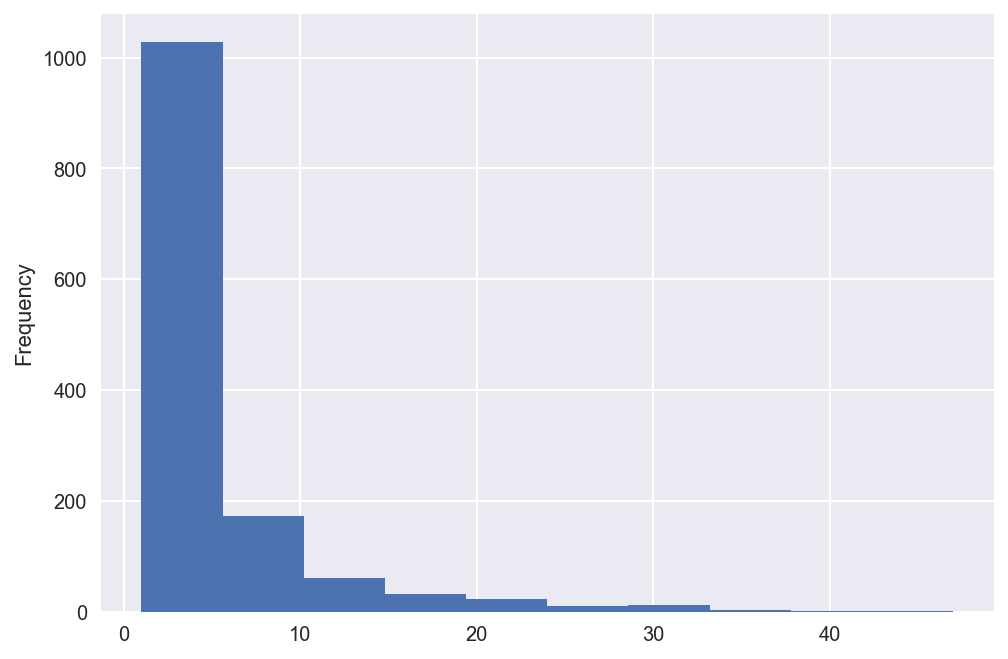

In [38]:
player.award_count.plot.hist()

### 15. Which Award is really the pass to HOF?
The following fig shows that *Triple Crown* and *TSN Guild MVP* are really big passes to HOF. *Baseball Magazine All-Star* takes the most part of award and is also a good pass to HOF. There're also some irrelvent awarded such as *Golden Glove*, *Silver Slugger*. Awarded these prizes are not passes to HOF.

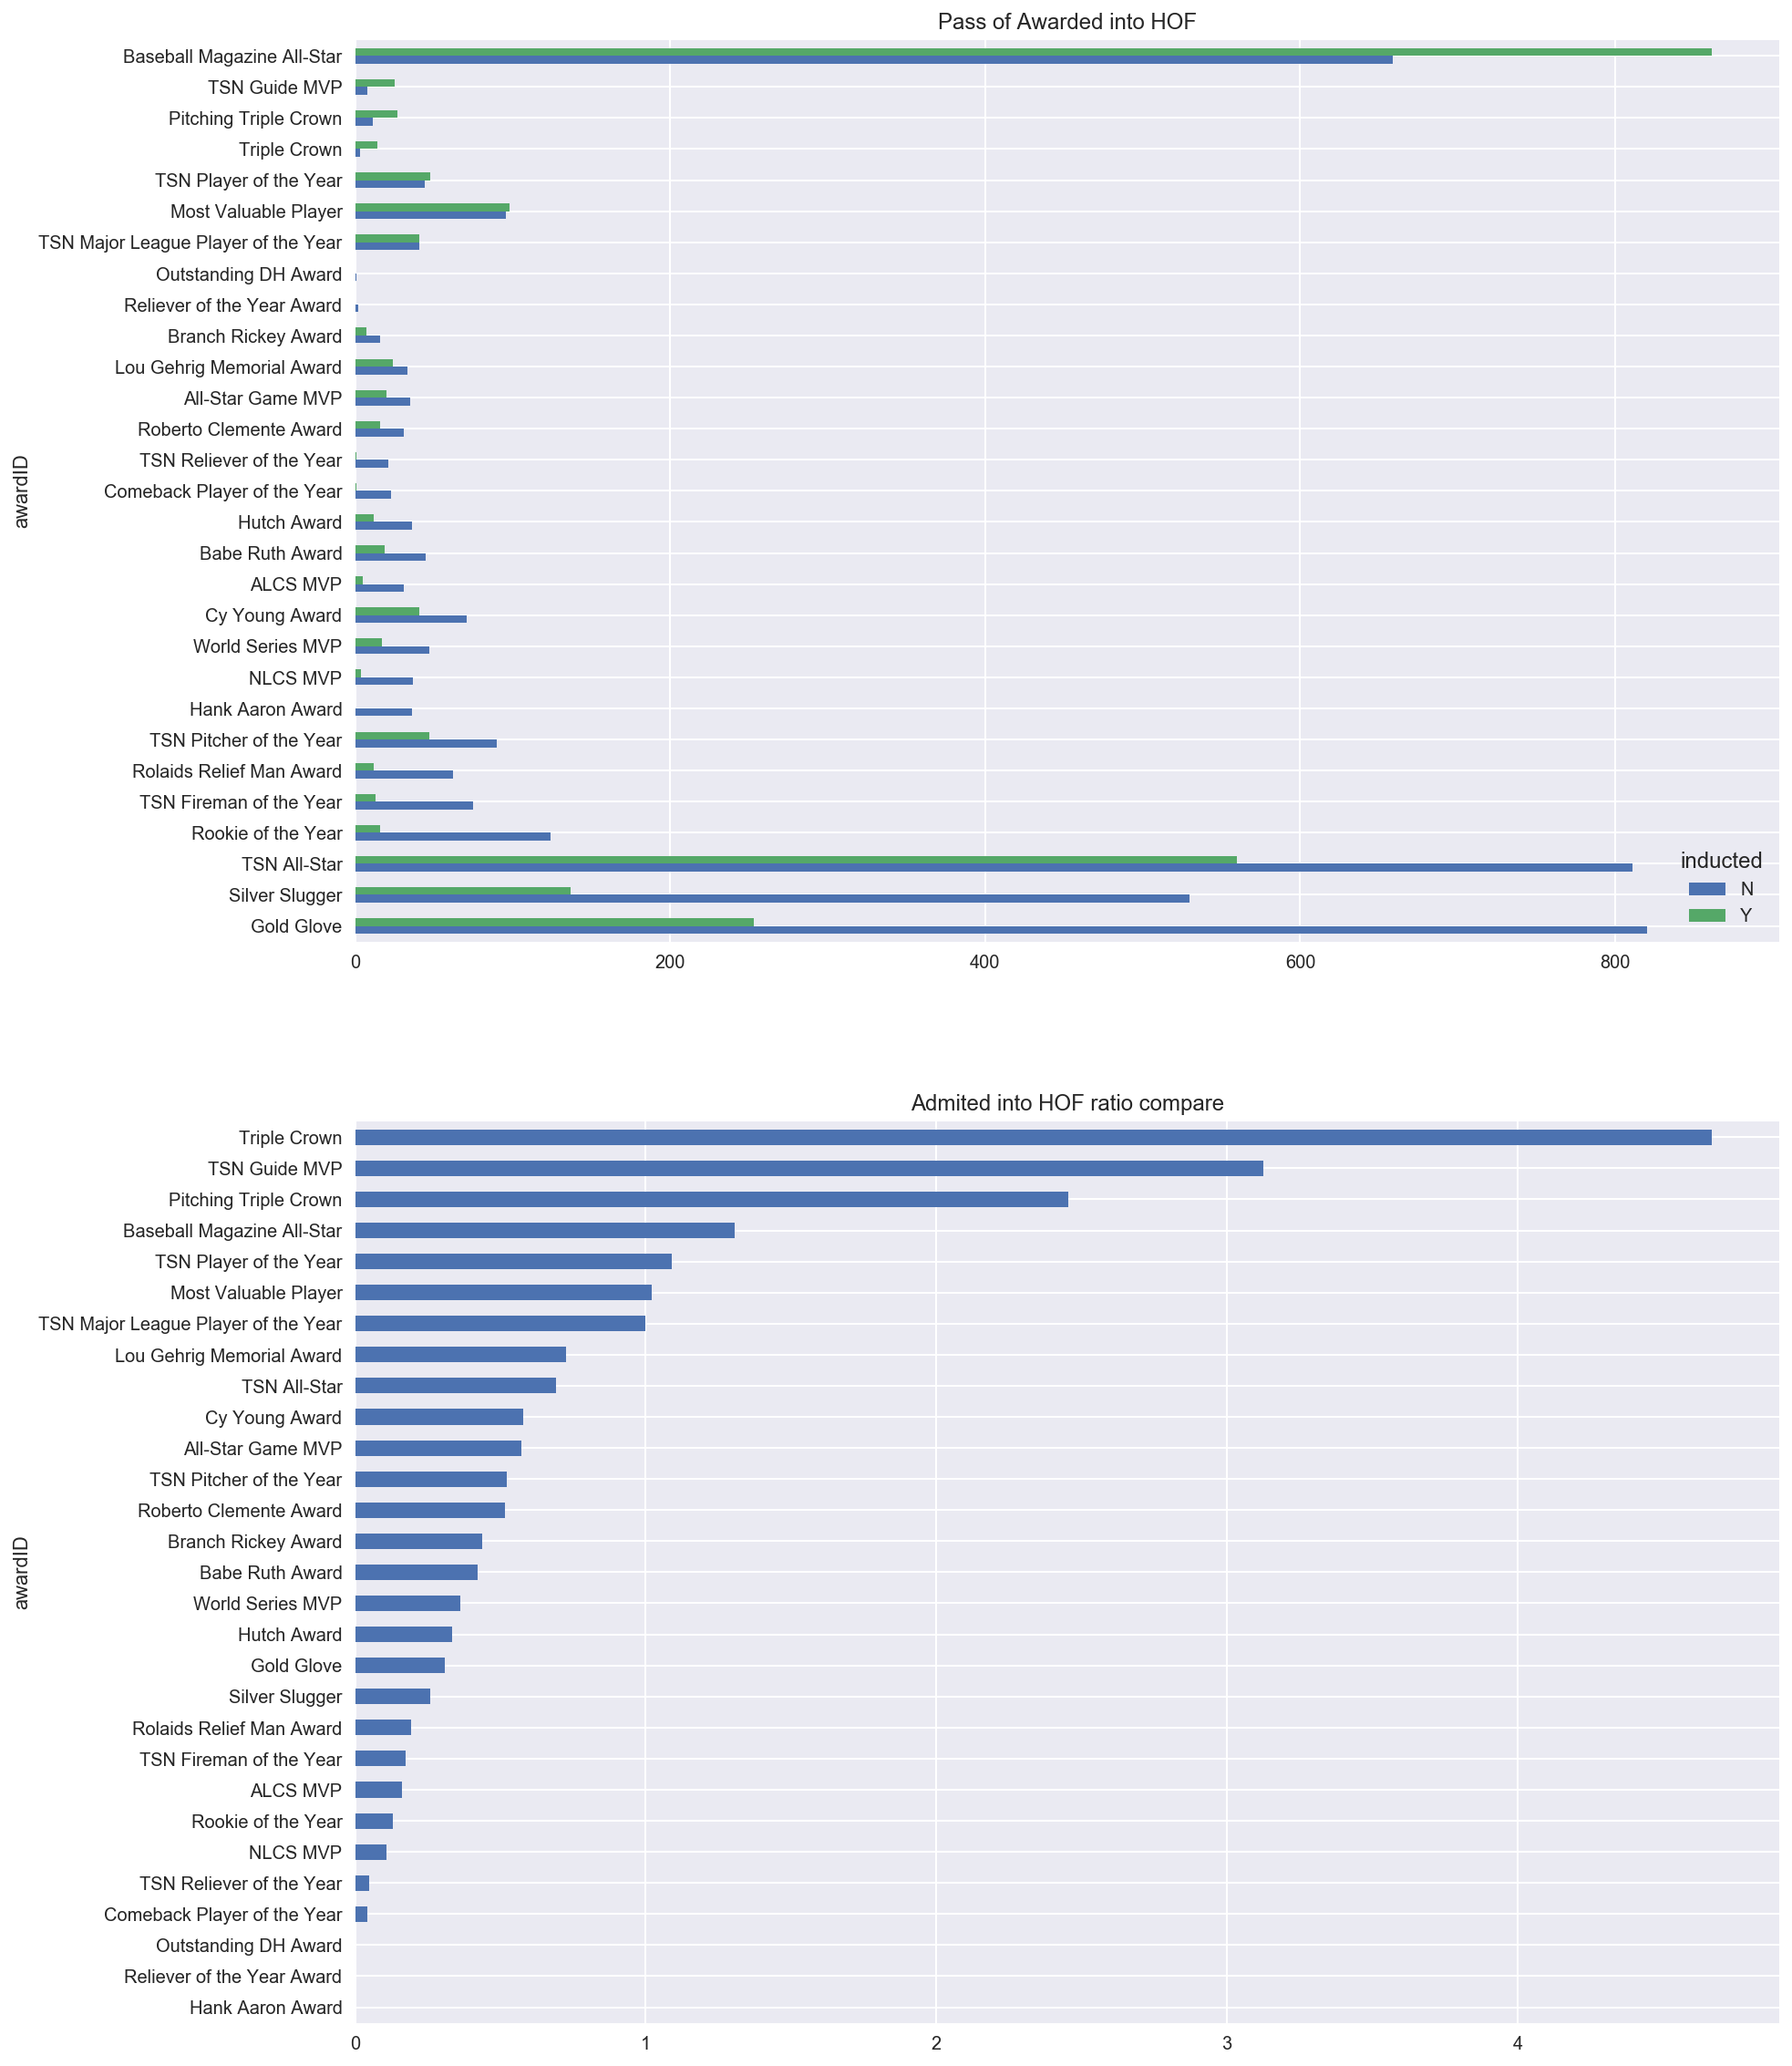

In [39]:
awarded = awards.groupby(["awardID","inducted"]).size().unstack()
awarded = awarded.fillna(0)
awarded["delta"] = awarded["Y"] - awarded["N"]
awarded["ratio"] = awarded["Y"]/awarded["N"]

fig,axes_award = plt.subplots(2,1,figsize=(14,20))
awarded.sort_values(by="delta",ascending=True)[["N","Y"]].plot(kind="barh",ax=axes_award[0]\
                                                               ,title="Pass of Awarded into HOF")
awarded.ratio.sort_values().plot.barh(ax=axes_award[1],title = "Admited into HOF ratio compare")

### 16. Have more awarded is a good signal to be admited into HOF?
The logic seems to be true that have more awarded maybe a good signal to be admitted into HOF. The boxplot shows that: player in HOF really have more awards than the players haven't. But there always be some exception, for example, the one have 47 awarded.

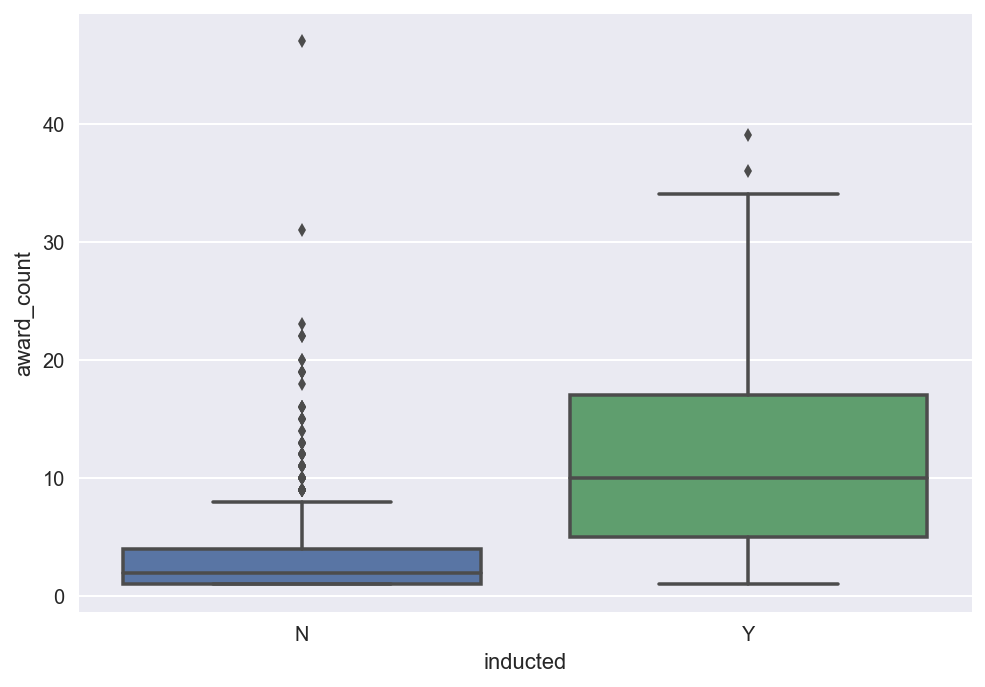

In [45]:
sns.boxplot(x="inducted",y="award_count",data=player)

# Conclusion and Future Work
---

## Conclusion
Finally, we come to our journey end, there still have a lot of things to mining, but i will stop here.  
1. First we must learn what happening in Hall Of Fame, so we take an exploration in it. We found if we voted by somebody like **Veterans**, we will have a higher oppotunity to the HOF. Some year we really have a high rate of being admitted into HOF, the time is also a very important factor to HOF.
2. We have a explortion in player's biographic data and we found to be a member HOF really all have around 10 years experience and their body infomation shouldn't not be an outlier, to cater our fans passion.  
3. To be a HOF, we see the member of HOF have excellent skills to outperform other normal players. In the battlefield, skill talks.  
4. A member of HOF may not take the highest salary, however, because they should have magic sleeves, their salary are surely above most people. But high salary does not qualify them to HOF.
5. The one in the HOF may not have a lot awrards, but some award such as **Triple Crown** almost all admitted into HOF. In our imagnation, player hits many triple hit or homerun is truly a legend.  

## Drawback declartion  
There should be some mistakes in this project such as:  
1. dealing with the missing values, when there's NAN, i always use 0 to fill it.
2. The variables could have correlation, so not all the conclusion are causation inference but correlation.  

## Future Work 
Truly, the dataset is very huge, there're still a lot info we can mining, for example:  
1. player's performance is a huge goldmine.  
2. their team performance  

I will stop here. Thank for the people reading my work.

